<center>
    <img src="https://play-lh.googleusercontent.com/HGfb2ClmDEA6xydDMJRQtQ5JfQcHiOJT2PKCBlNTkgJZv6igmrHHFmz4010OCq2Q8cY" />
<center>

<div style="background-color: white; color: #333; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <center><h1 style="color: #8B008B;">WineDecoder</h1></center>
    <p style="font-size: 16px; line-height: 1.6;">
        <center>In this analysis, I explore the factors influencing the quality of red wine.
        Let's uncover the key components that contribute to the perceived quality of red wines.</center>
    </p>
</div>


<img src="https://storage.googleapis.com/kaggle-datasets-images/4458/6836/30587db9a40233164f65a4a3f148f40d/dataset-cover.jpg?t=2017-11-12-14-28-34" />

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
import math
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import torch
from torch import nn
import torch.optim as optim
import warnings
warnings.filterwarnings('ignore')

<a id="data"></a>
<h1><b><p style="background-image: url(https://colorswall.com/images/palettes/shades-xkcd-color-red-wine-8c0034-hex-35132-colorswall.png);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Data</p></b></h1>

In [2]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values, no need for imputation.

In [5]:
df.columns, len(df.columns)

(Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol', 'quality'],
       dtype='object'),
 12)

We have 12 columns, 11 independent and 1 dependent(quality)

<div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Number of columns = 12</center></h4>

* **fixed acidity** - most acids involved with wine or fixed or nonvolatile (do not evaporate readily) <br>
* **volatile acidity** - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste <br>
* **citric acid** - found in small quantities, citric acid can add freshness and flavor to the wines <br>
* **residiual sugar** - the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet <br>
* **chlorides** - the amount of salt in the wine <br>
* **free sulfur dioxide** - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine <br>
* **total sulfux dioxide** - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine <br>
* **density** - the density of water is close to that of water depending on the percent alcohol and sugar content <br>
* **pH** - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale <br>
* **sulphates** - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant <br>
* **alcohol** - the percent alcohol content of the wine
* **quality** - score between 0 and 10

<a id="data"></a>
<h1><b><p style="background-image: url(https://colorswall.com/images/palettes/shades-xkcd-color-red-wine-8c0034-hex-35132-colorswall.png);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Exploratory Data Analysis</p></b></h1>

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


It does not get more clear just by looking at numbers, that's why I will plot them later.

In [8]:
df["quality"].nunique()

6

In [9]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

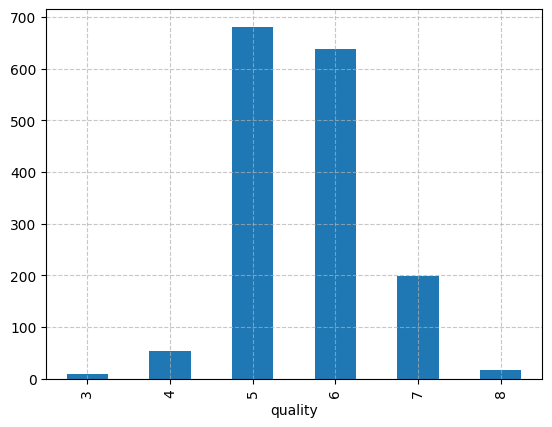

In [10]:
df["quality"].value_counts().sort_index().plot(kind="bar")
plt.grid(True, linestyle='--', alpha=0.7)

There are six quality classes ranging from 3 to 8.<br>
As we can see, there are a lot of values in the middle of the stack.

In [11]:
skew(df['quality'])

0.21759720553467285

Almost normal distribution.

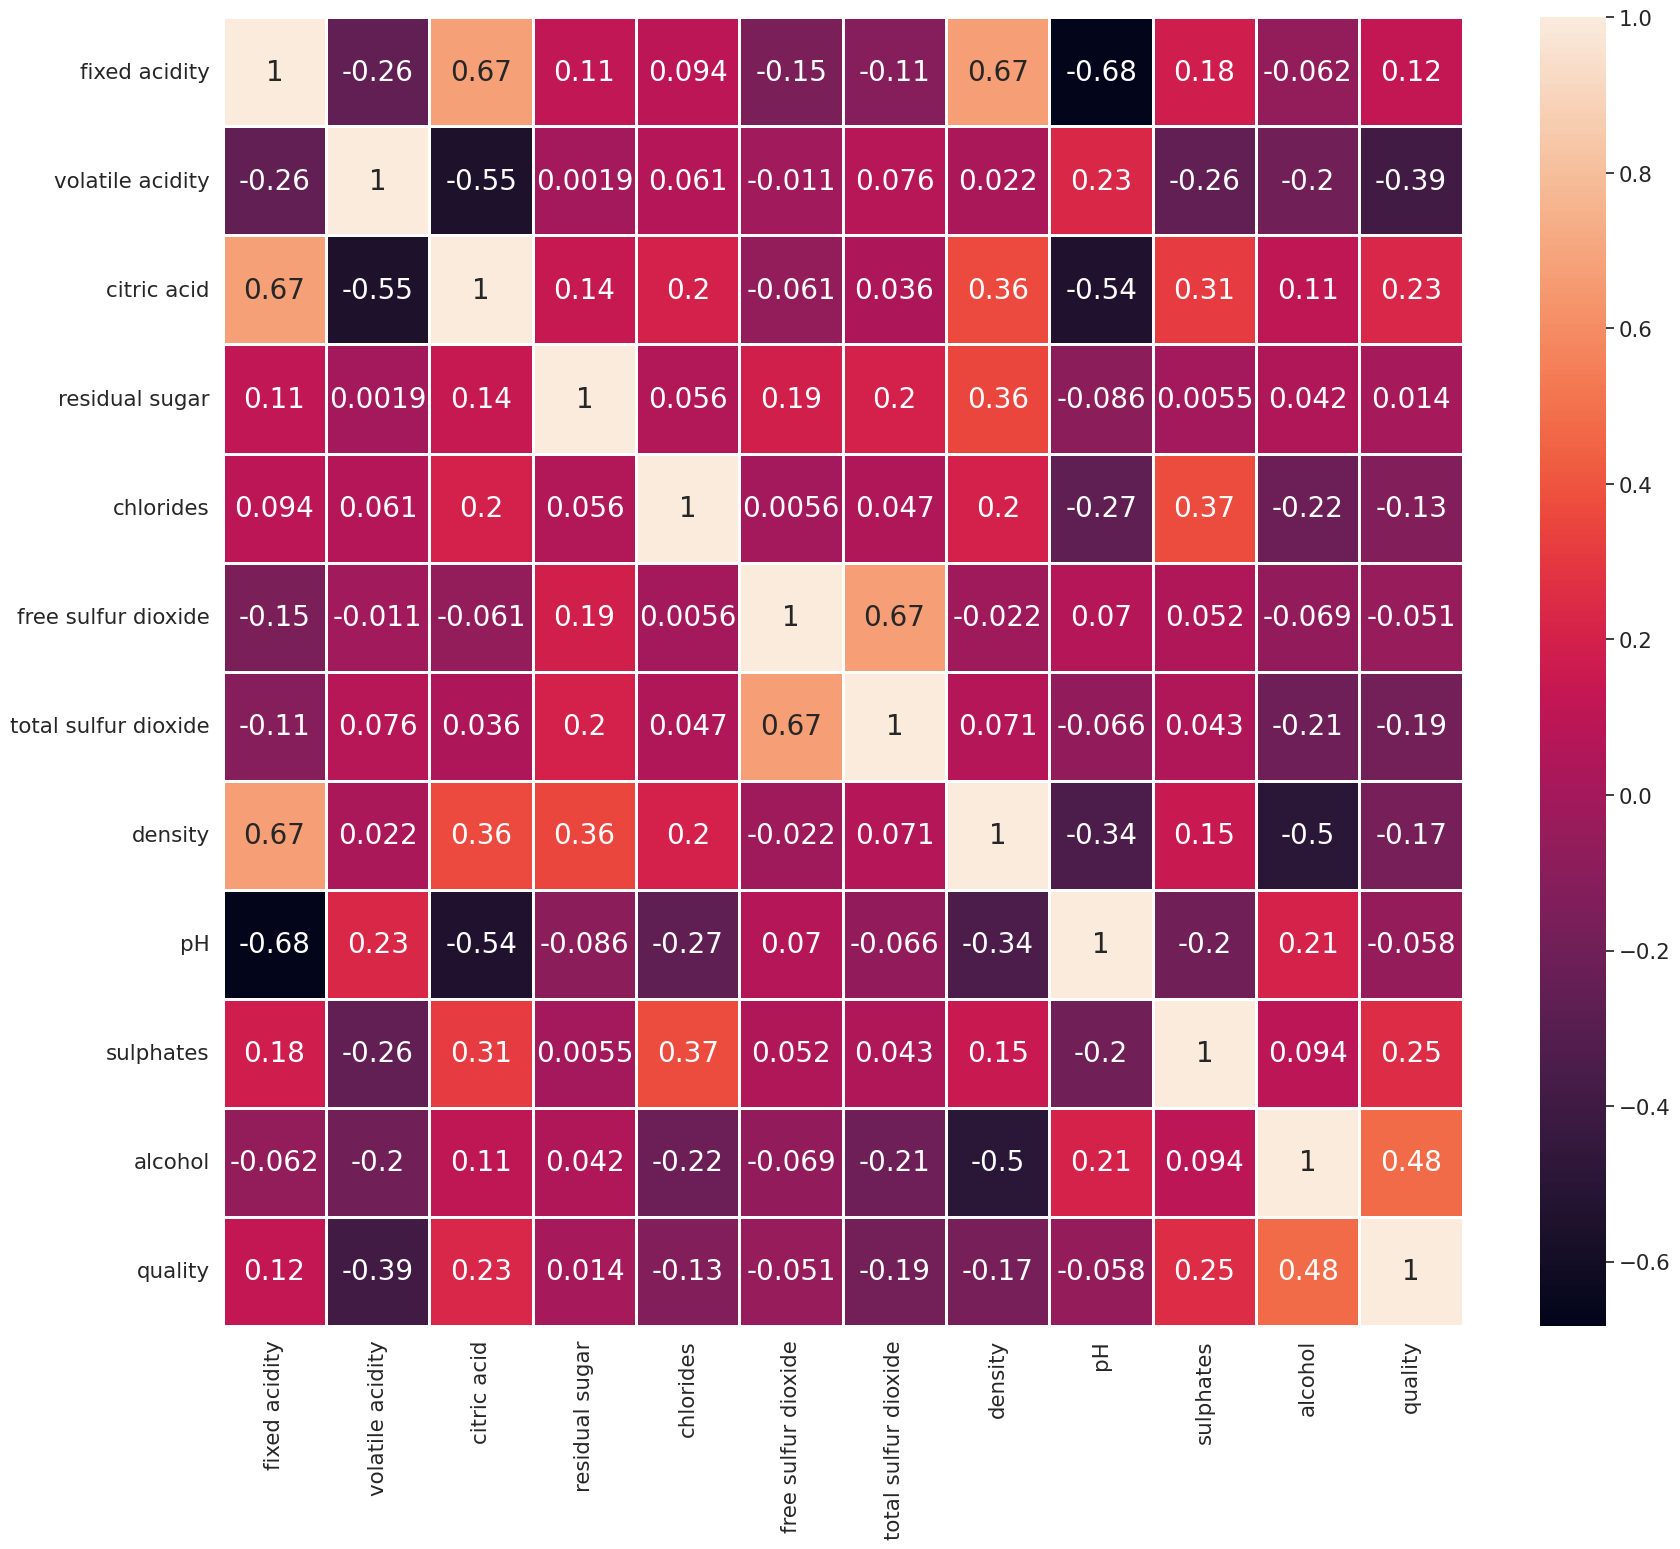

In [12]:
sns.set(font_scale=1.4)
plt.figure(figsize=(20, 17))
sns.heatmap(df.corr(), annot=True,
            linewidth=.8, mask=None, cmap="rocket", annot_kws={"size":20});

Insights from above figure:
* Alcohol and quality of wine are positively correlated.
* The quality of wine is highly related to volatile acidity.
* A decrease in density tends to lead to an increase in quality
* Fixed acidity and citric acid have strong correlation.
* Fixed acidity and density also have strong correlation.
* Fixed acidity and pH has strong negative correlation.
* Total sulfur dioxide and free sulfur dioxide have strong correlation, which is to be expected.
* pH has a negative correlation with density, fixed acidity, citric acid, and sulfates. <br><br><br>

There is some multicolinearity in the dataset. Especially the pH feature. I'm going to leave it as it is, just want to see vanilla algorithms and little to no preprocessing affect results.

In [13]:
arr = []
for col in df.columns:
    if col == "quality":
        continue
    correlation_coefficient = df[col].corr(df['quality'])
    arr.append(abs(correlation_coefficient))

In [14]:
sorted(arr)

[0.013731637340066292,
 0.0506560572442763,
 0.05773139120538215,
 0.12405164911322428,
 0.1289065599300526,
 0.17491922778334887,
 0.18510028892653776,
 0.22637251431804123,
 0.2513970790692614,
 0.390557780264007,
 0.47616632400113584]

alcohol:               0.4761663240011354<br>
volatile acidity:     -0.390557780264007<br>
sulphates:             0.2513970790692613<br>
citric acid:           0.22637251431804117<br>
total sulfur dioxide: -0.18510028892653768<br>
density:              -0.17491922778334867<br>
chlorides:            -0.12890655993005257<br>
fixed acidity:         0.12405164911322425<br><br>
**These are the top influencers on the quality of the wine. Now I'm going to investigate the top 8 results with different plots and see how much they influence quality.**

<div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Alcohol</center></h4>

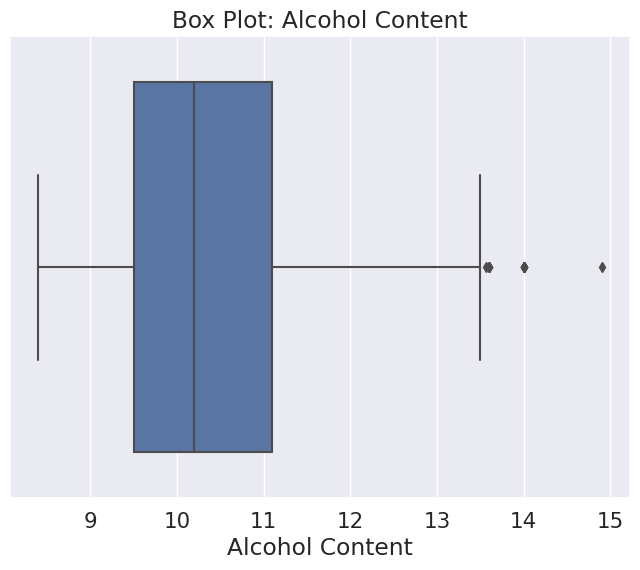

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['alcohol'])
plt.title('Box Plot: Alcohol Content')
plt.xlabel('Alcohol Content')
plt.show()

As we can clearly see, the alcohol content in each wine is centered around the median(ascendingly sorted array, where the median is the point where the separation between the lower and the higher half occurs). 
Q1 - left from the median is the 25 percentile, while Q3 - right from the median is the 75 perecentile.
We have some outliers from the right. Outliers means that a value is out of boundaries of Q3 + 1.5 * IQR(interquartile range) or Q1 - 1.5 * IQR(interquartile range).
Most of the alcohol content is around 10

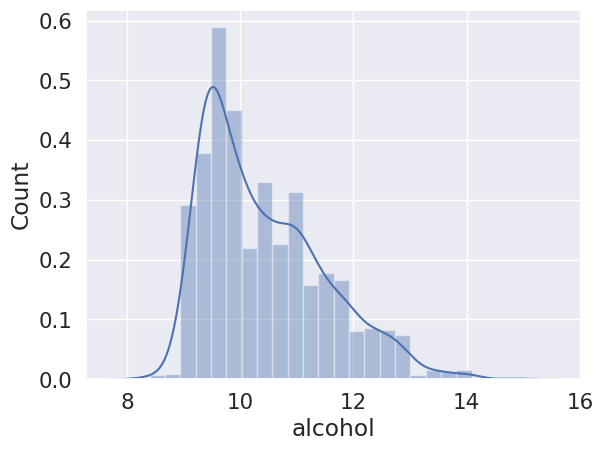

In [16]:
sns.distplot(df['alcohol'])
plt.ylabel('Count') 
plt.show()

In [17]:
skew(df['alcohol'])

0.8600210646566755

Another useful plot that I could plot alongside the skewness of the column. Positive skewness(as is in this case) indicates that most of the values are relatively on the left side, while a few are on the right side(high alcohol content)

<div style="border-radius:10px;
            border : black solid;
            background-color: lightblue;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Hypothesis: More alcohol tends to lead to better quality.</center></h4>

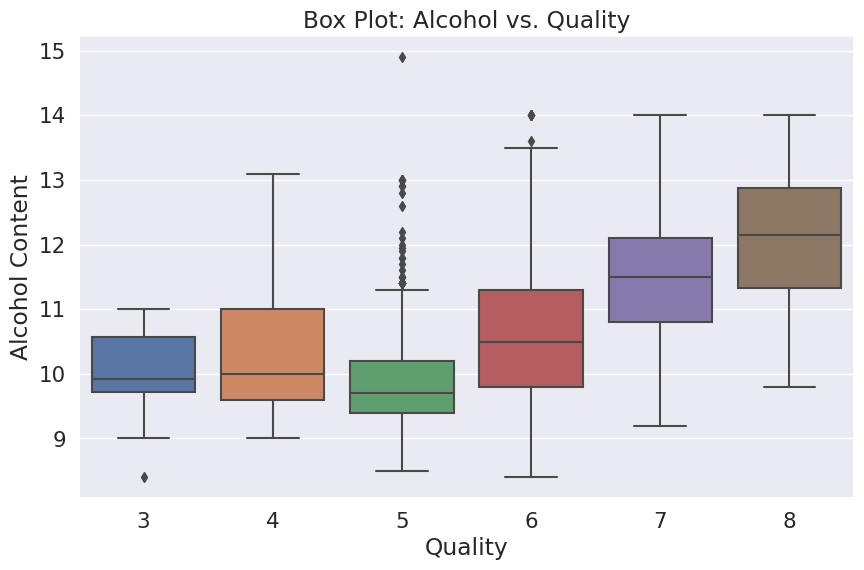

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Box Plot: Alcohol vs. Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

As it could be clearly seen, with quality being higher, the alcohol content is also getting higher. 
But keep in mind that correlation does not mean causality
<br><br><br><br>

<div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Sulphates</center></h4>

<div style="border-radius:10px;
            border : black solid;
            background-color: lightblue;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Hypothesis: Sulphates tend to lead to better quality.</center></h4>

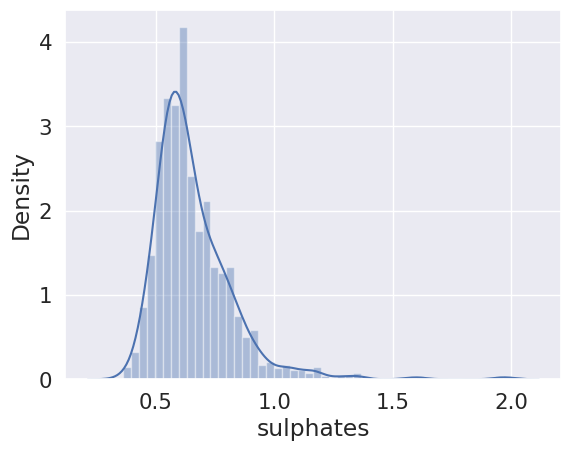

In [19]:
sns.distplot(df['sulphates'])
plt.show()

In [20]:
skew(df['sulphates'])

2.426393455449087

Sulphates are even more positively skewed, meaning that most of the values are on the left, while small part of the data is on the right.

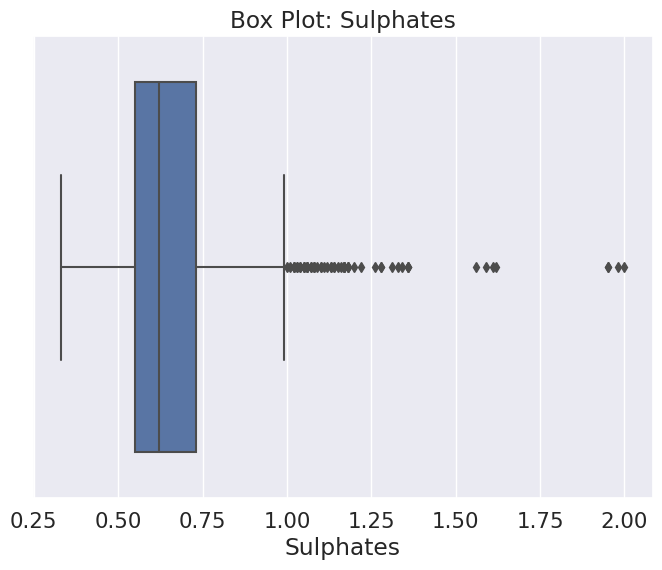

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['sulphates'])
plt.title('Box Plot: Sulphates')
plt.xlabel('Sulphates')
plt.show()

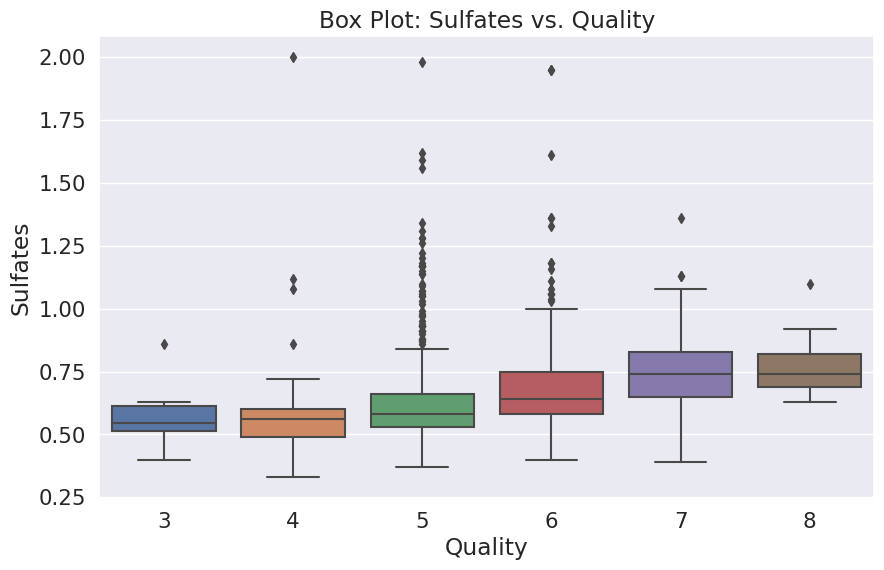

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='sulphates', data=df)
plt.title('Box Plot: Sulfates vs. Quality')
plt.xlabel('Quality')
plt.ylabel('Sulfates')
plt.show()

This plot shows that when sulfates are more, the quality tends to increase. There are a few outliers, but I decided to leave them in. <br><br><br>

<div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Fixed Acidity</center></h4>

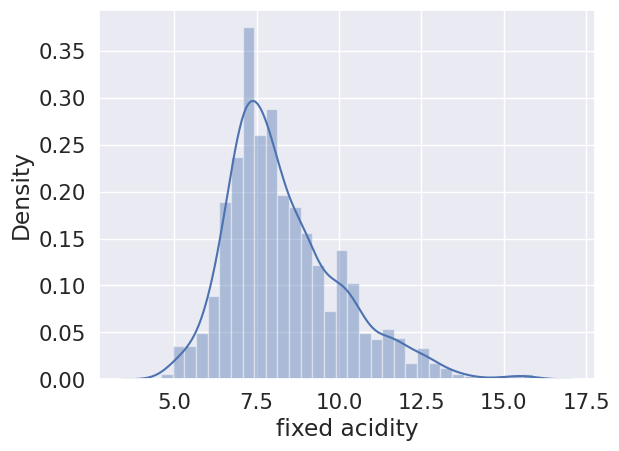

In [23]:
sns.distplot(df['fixed acidity'])
plt.show()

In [24]:
skew(df['fixed acidity'])

0.9818292953262073

Again, we have positive skewness.

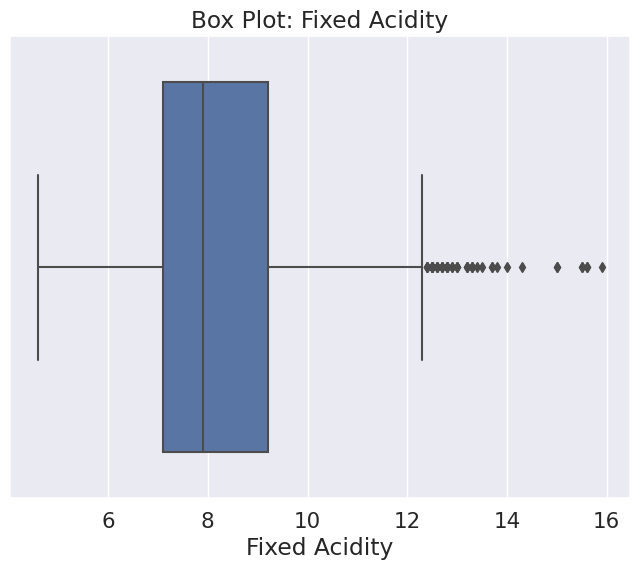

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['fixed acidity'])
plt.title('Box Plot: Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.show()

<div style="border-radius:10px;
            border : black solid;
            background-color: lightblue;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Hypothesis:  Fixed Acidity tends to have positive influence on quality.</center></h4>

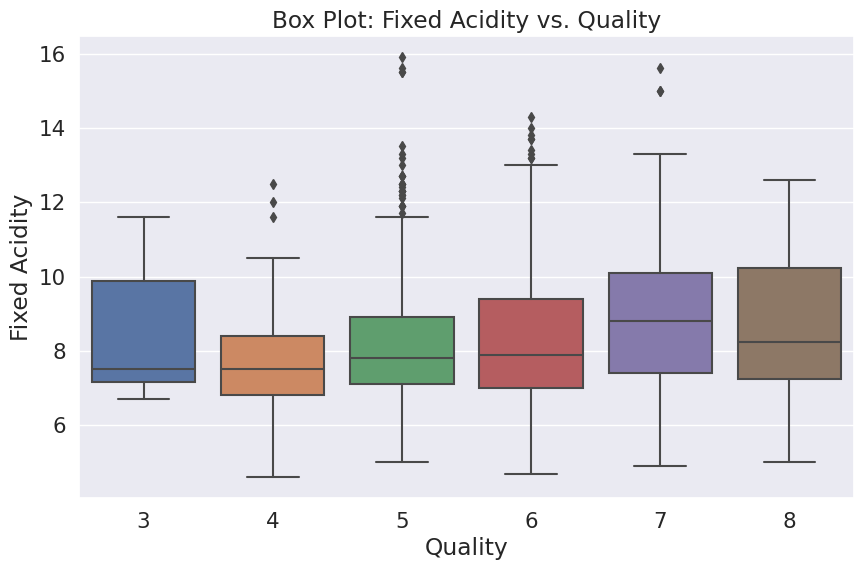

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='fixed acidity', data=df)
plt.title('Box Plot: Fixed Acidity vs. Quality')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.show()

Though not clearly visible, there tends to be a gradual increase of quality as the fixed acidity goes up. <br><br><br>

<div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Citric Acid</center></h4>

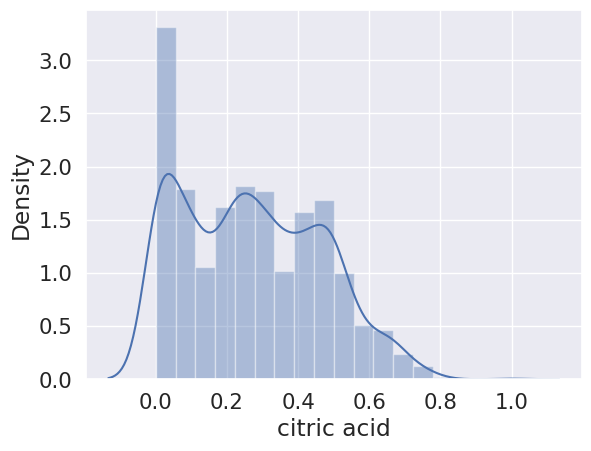

In [27]:
sns.distplot(df['citric acid'])
plt.show()

In [28]:
skew(df['citric acid'])

0.3180385895475358

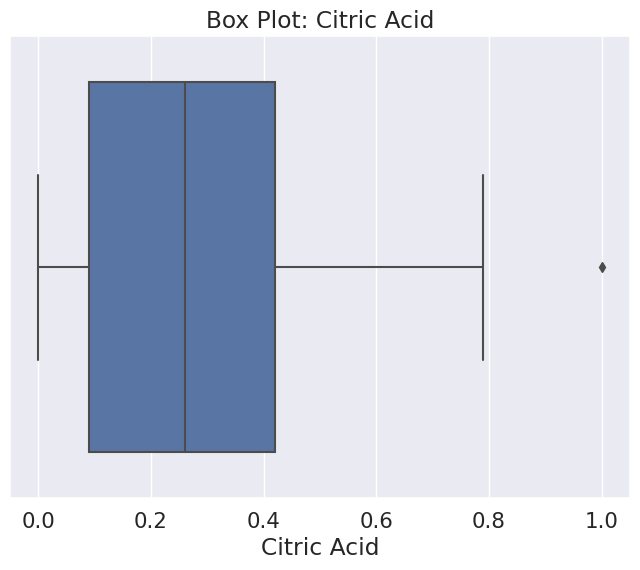

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['citric acid'])
plt.title('Box Plot: Citric Acid')
plt.xlabel('Citric Acid')
plt.show()

<div style="border-radius:10px;
            border : black solid;
            background-color: lightblue;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Hypothesis:
    Citric acid tends to have a positive influence on quality.</center></h4>

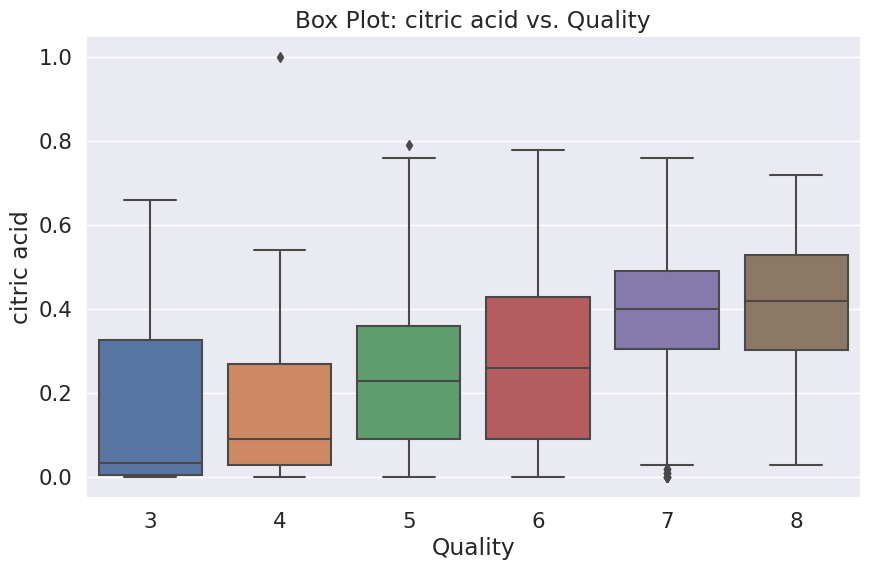

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='citric acid', data=df)
plt.title('Box Plot: citric acid vs. Quality')
plt.xlabel('Quality')
plt.ylabel('citric acid')
plt.show()

As the citric acid goes up, it usually tends to better quality. <br><br><br>

<div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Volatile Acidity</center></h4>

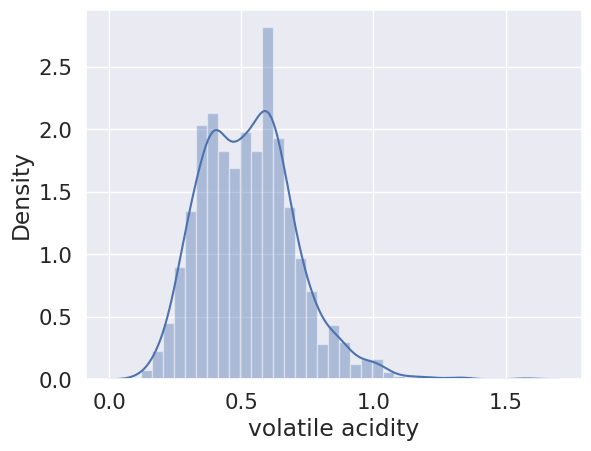

In [31]:
sns.distplot(df['volatile acidity'])
plt.show()

In [32]:
skew(df['volatile acidity'])

0.6709623963499574

Another positively skewed distribution.

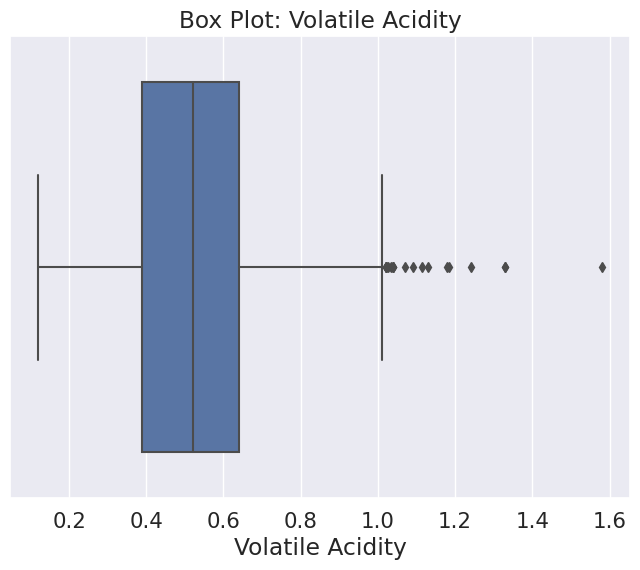

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['volatile acidity'])
plt.title('Box Plot: Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.show()

<div style="border-radius:10px;
            border : black solid;
            background-color: lightblue;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Hypothesis: Decrease in volatile acidity tends to increase quality.</center></h4>

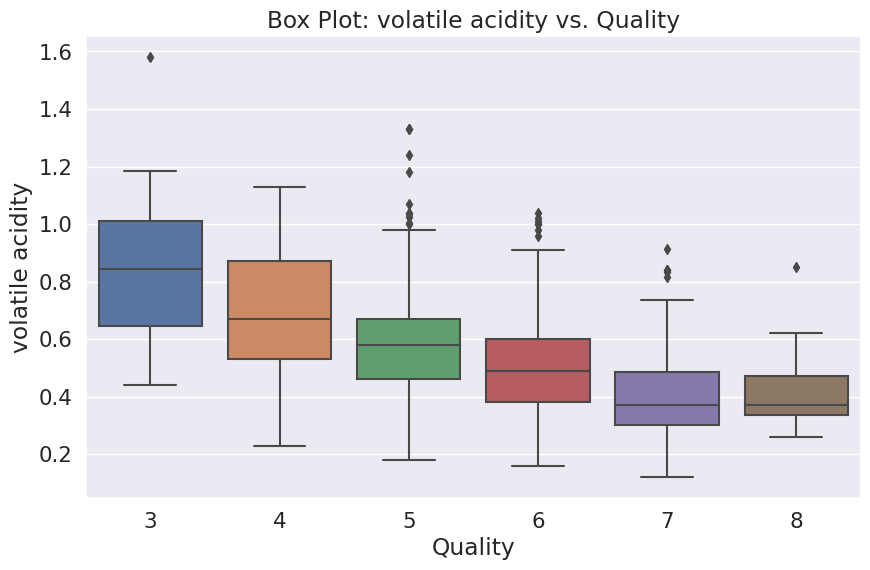

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Box Plot: volatile acidity vs. Quality')
plt.xlabel('Quality')
plt.ylabel('volatile acidity')
plt.show()

Decrease in volatile acidity usually makes the quality of wine better. <br><br><br>

<div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Total Sulfur Dioxide</center></h4>

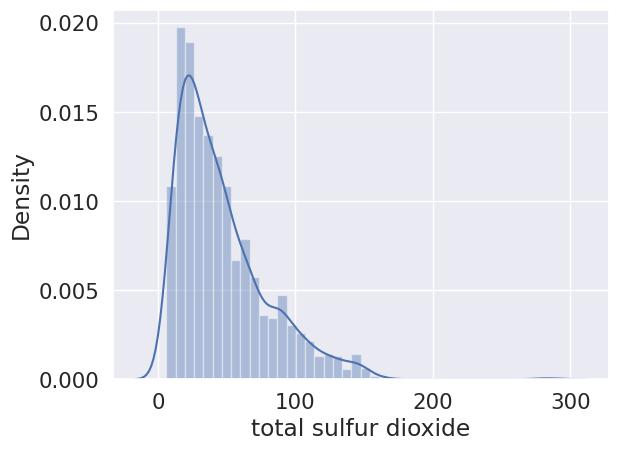

In [35]:
sns.distplot(df['total sulfur dioxide'])
plt.show()

In [36]:
skew(df['total sulfur dioxide'])

1.5141091878506638

Another positively skewed distribution

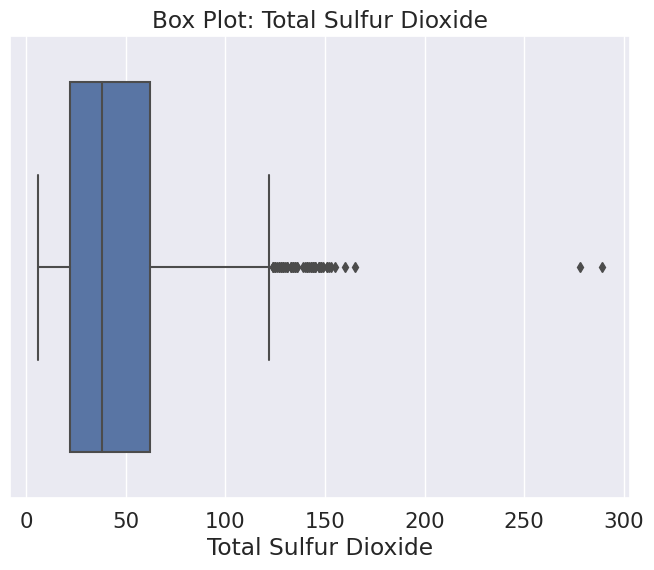

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['total sulfur dioxide'])
plt.title('Box Plot: Total Sulfur Dioxide')
plt.xlabel('Total Sulfur Dioxide')
plt.show()

<div style="border-radius:10px;
            border : black solid;
            background-color: lightblue;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Hypothesis: Total sulfur dioxide decrease tends to increase quality.</center></h4>

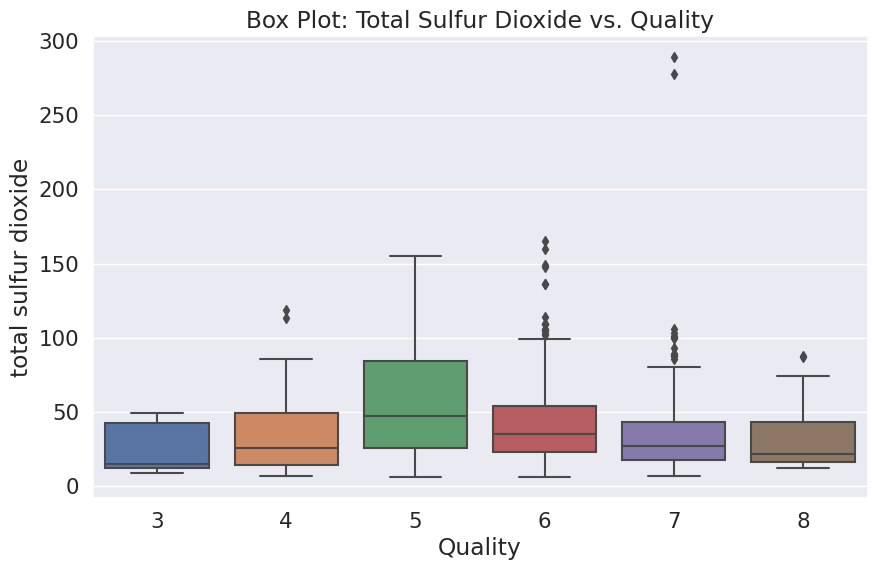

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='total sulfur dioxide', data=df)
plt.title('Box Plot: Total Sulfur Dioxide vs. Quality')
plt.xlabel('Quality')
plt.ylabel('total sulfur dioxide')
plt.show()

When the quality is over 5, the quality tends to increase a little.<br><br><br>

<div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Density</center></h4>

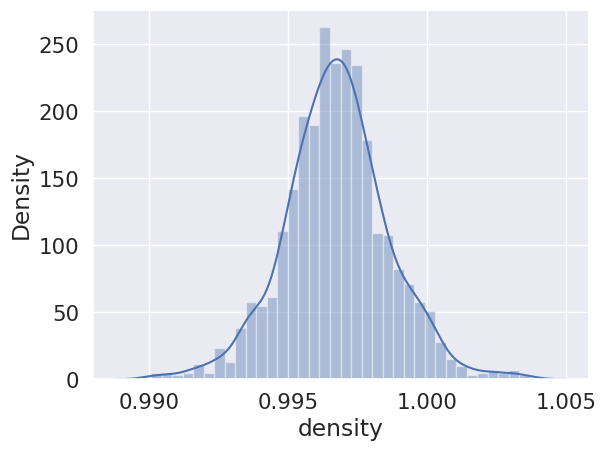

In [39]:
sns.distplot(df['density'])
plt.show()

In [40]:
skew(df['density'])

0.07122077153539946

It looks like it's close to normal distribution.

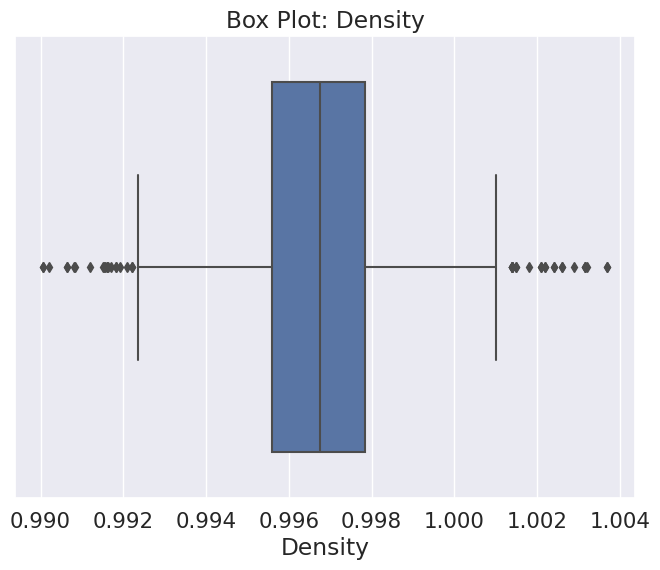

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['density'])
plt.title('Box Plot: Density')
plt.xlabel('Density')
plt.show()

<div style="border-radius:10px;
            border : black solid;
            background-color: lightblue;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Hypothesis: Decrease in density tend to increase quality.</center></h4>

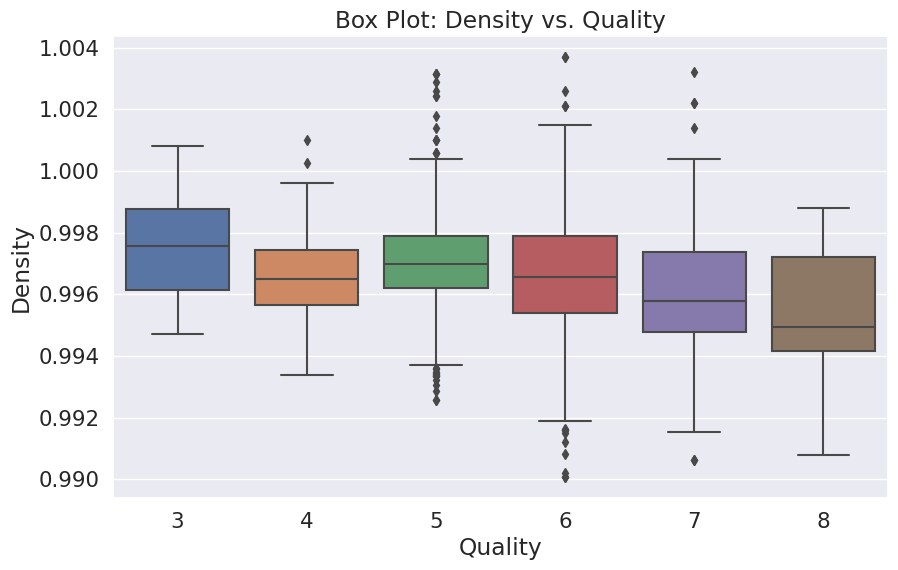

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='density', data=df)
plt.title('Box Plot: Density vs. Quality')
plt.xlabel('Quality')
plt.ylabel('Density')
plt.show()

As the density decreases it tends to increases quality. <br><br><br>

<div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Chlorides</center></h4>

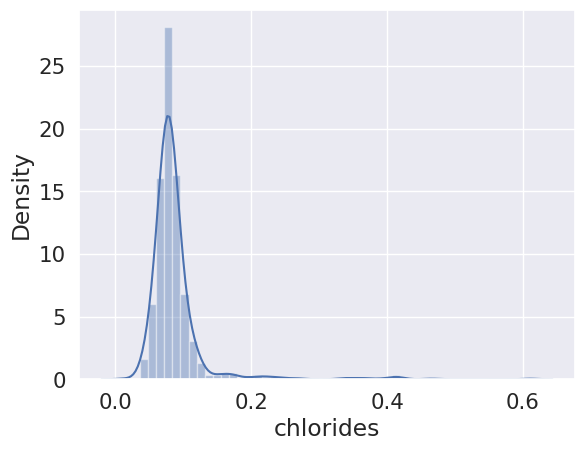

In [43]:
sns.distplot(df['chlorides'])
plt.show()

In [44]:
skew(df['chlorides'])

5.675016527504258

Highly positively skewed.

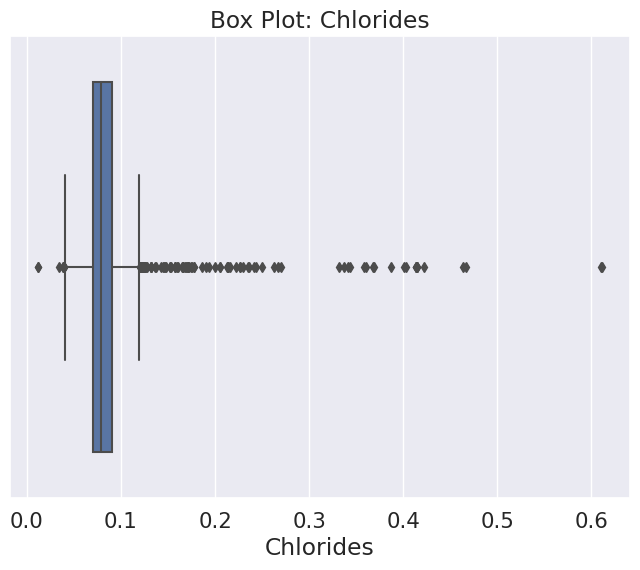

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['chlorides'])
plt.title('Box Plot: Chlorides')
plt.xlabel('Chlorides')
plt.show()

<div style="border-radius:10px;
            border : black solid;
            background-color: lightblue;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'>
    <center>Hypothesis: Decrease in chlorides tend to increase quality.</center></h4>

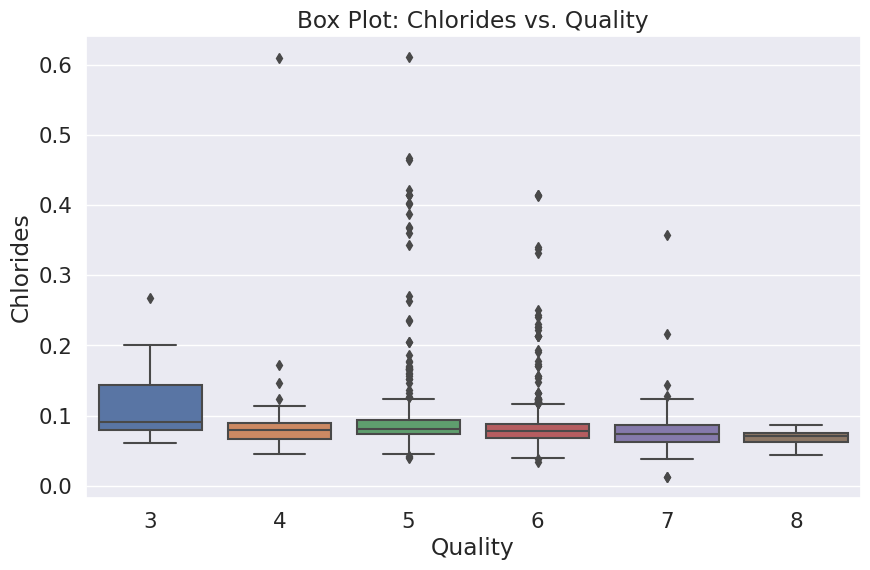

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='chlorides', data=df)
plt.title('Box Plot: Chlorides vs. Quality')
plt.xlabel('Quality')
plt.ylabel('Chlorides')
plt.show()

Decrease in chlorides tends to lead to small increase quality. 

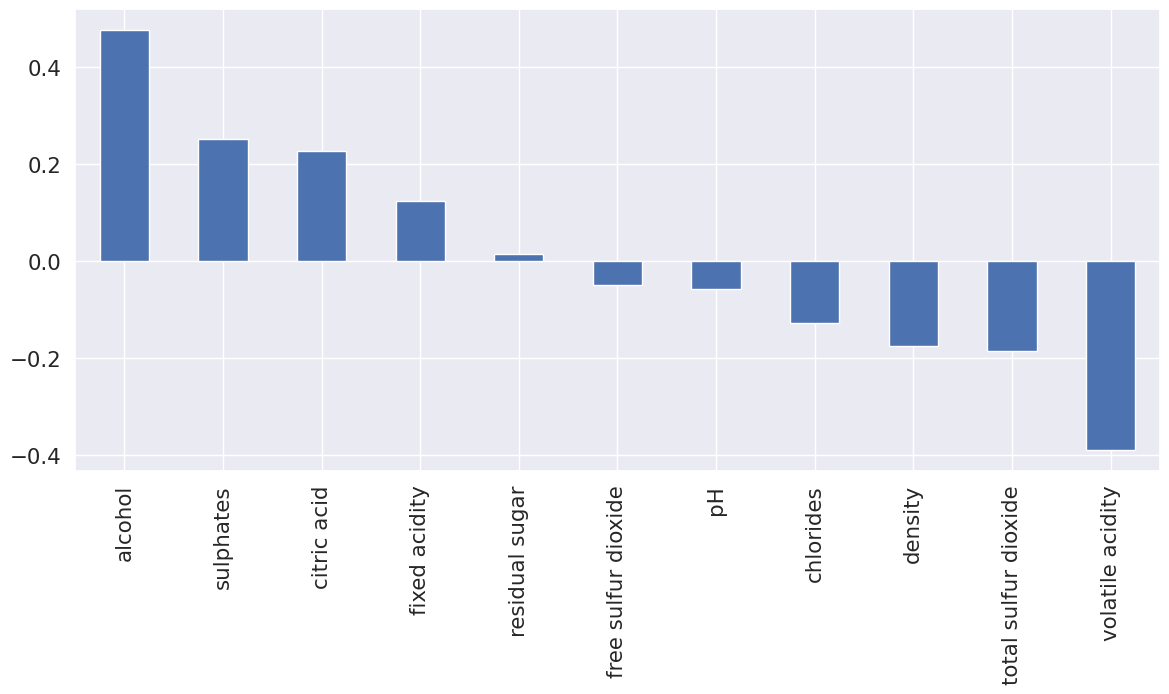

In [47]:
plt.figure(figsize=(14,6))
corr = df.corr()['quality'].sort_values(ascending=False)
corr.drop('quality').plot(kind='bar')
plt.show()

This plot sums up pretty nice the correlation between the independent variables and dependent one. <br>
I've plotted exactly 8 of them. I've left 3 of them, because their impact is small on the quality. <br>
<h5>
    Remembering that correlation does not mean causation, that's why I've always put "tend" to do something.
<h5>

Text(0.5, 0, 'Skewness')

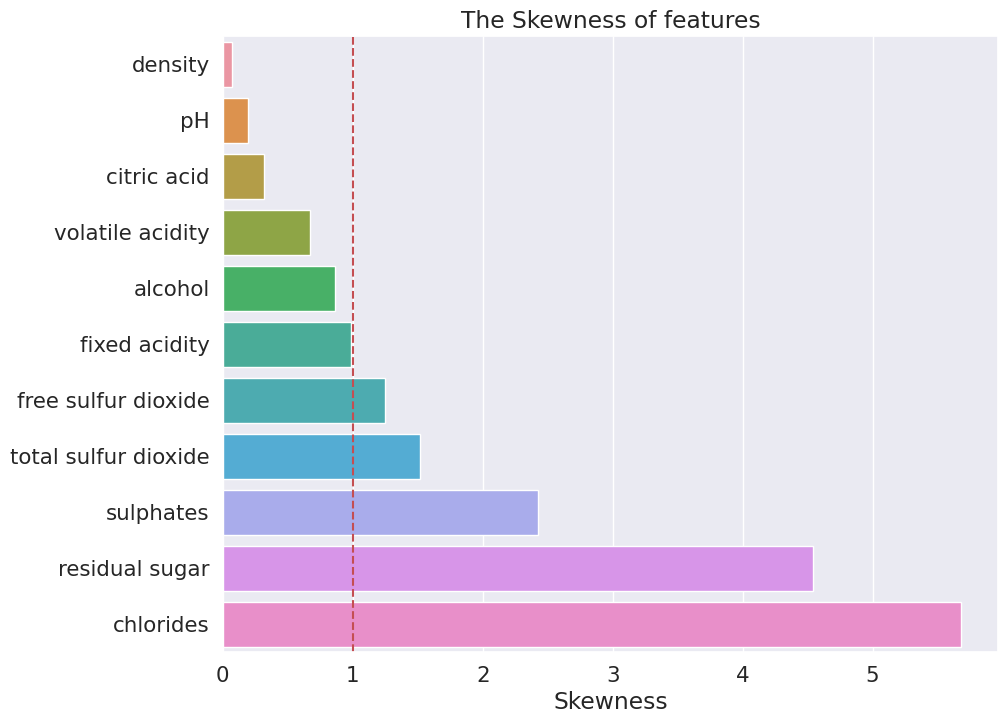

In [48]:
plt.figure(figsize=(10,8))
skewness=df.drop("quality", axis=1).skew().sort_values()
sns.barplot(x=skewness,y=skewness.index).set_title('The Skewness of features')
plt.axvline(x=1, color='r', linestyle='--')
plt.xlabel('Skewness')

This is the skewness of the columns. Fast google check told me that a few of the machine learning algorithms might be affected by this, for example MANOVA, ANOVA and few other. I won't use them later, so, I will leave the skewed features as they are. <br><br>

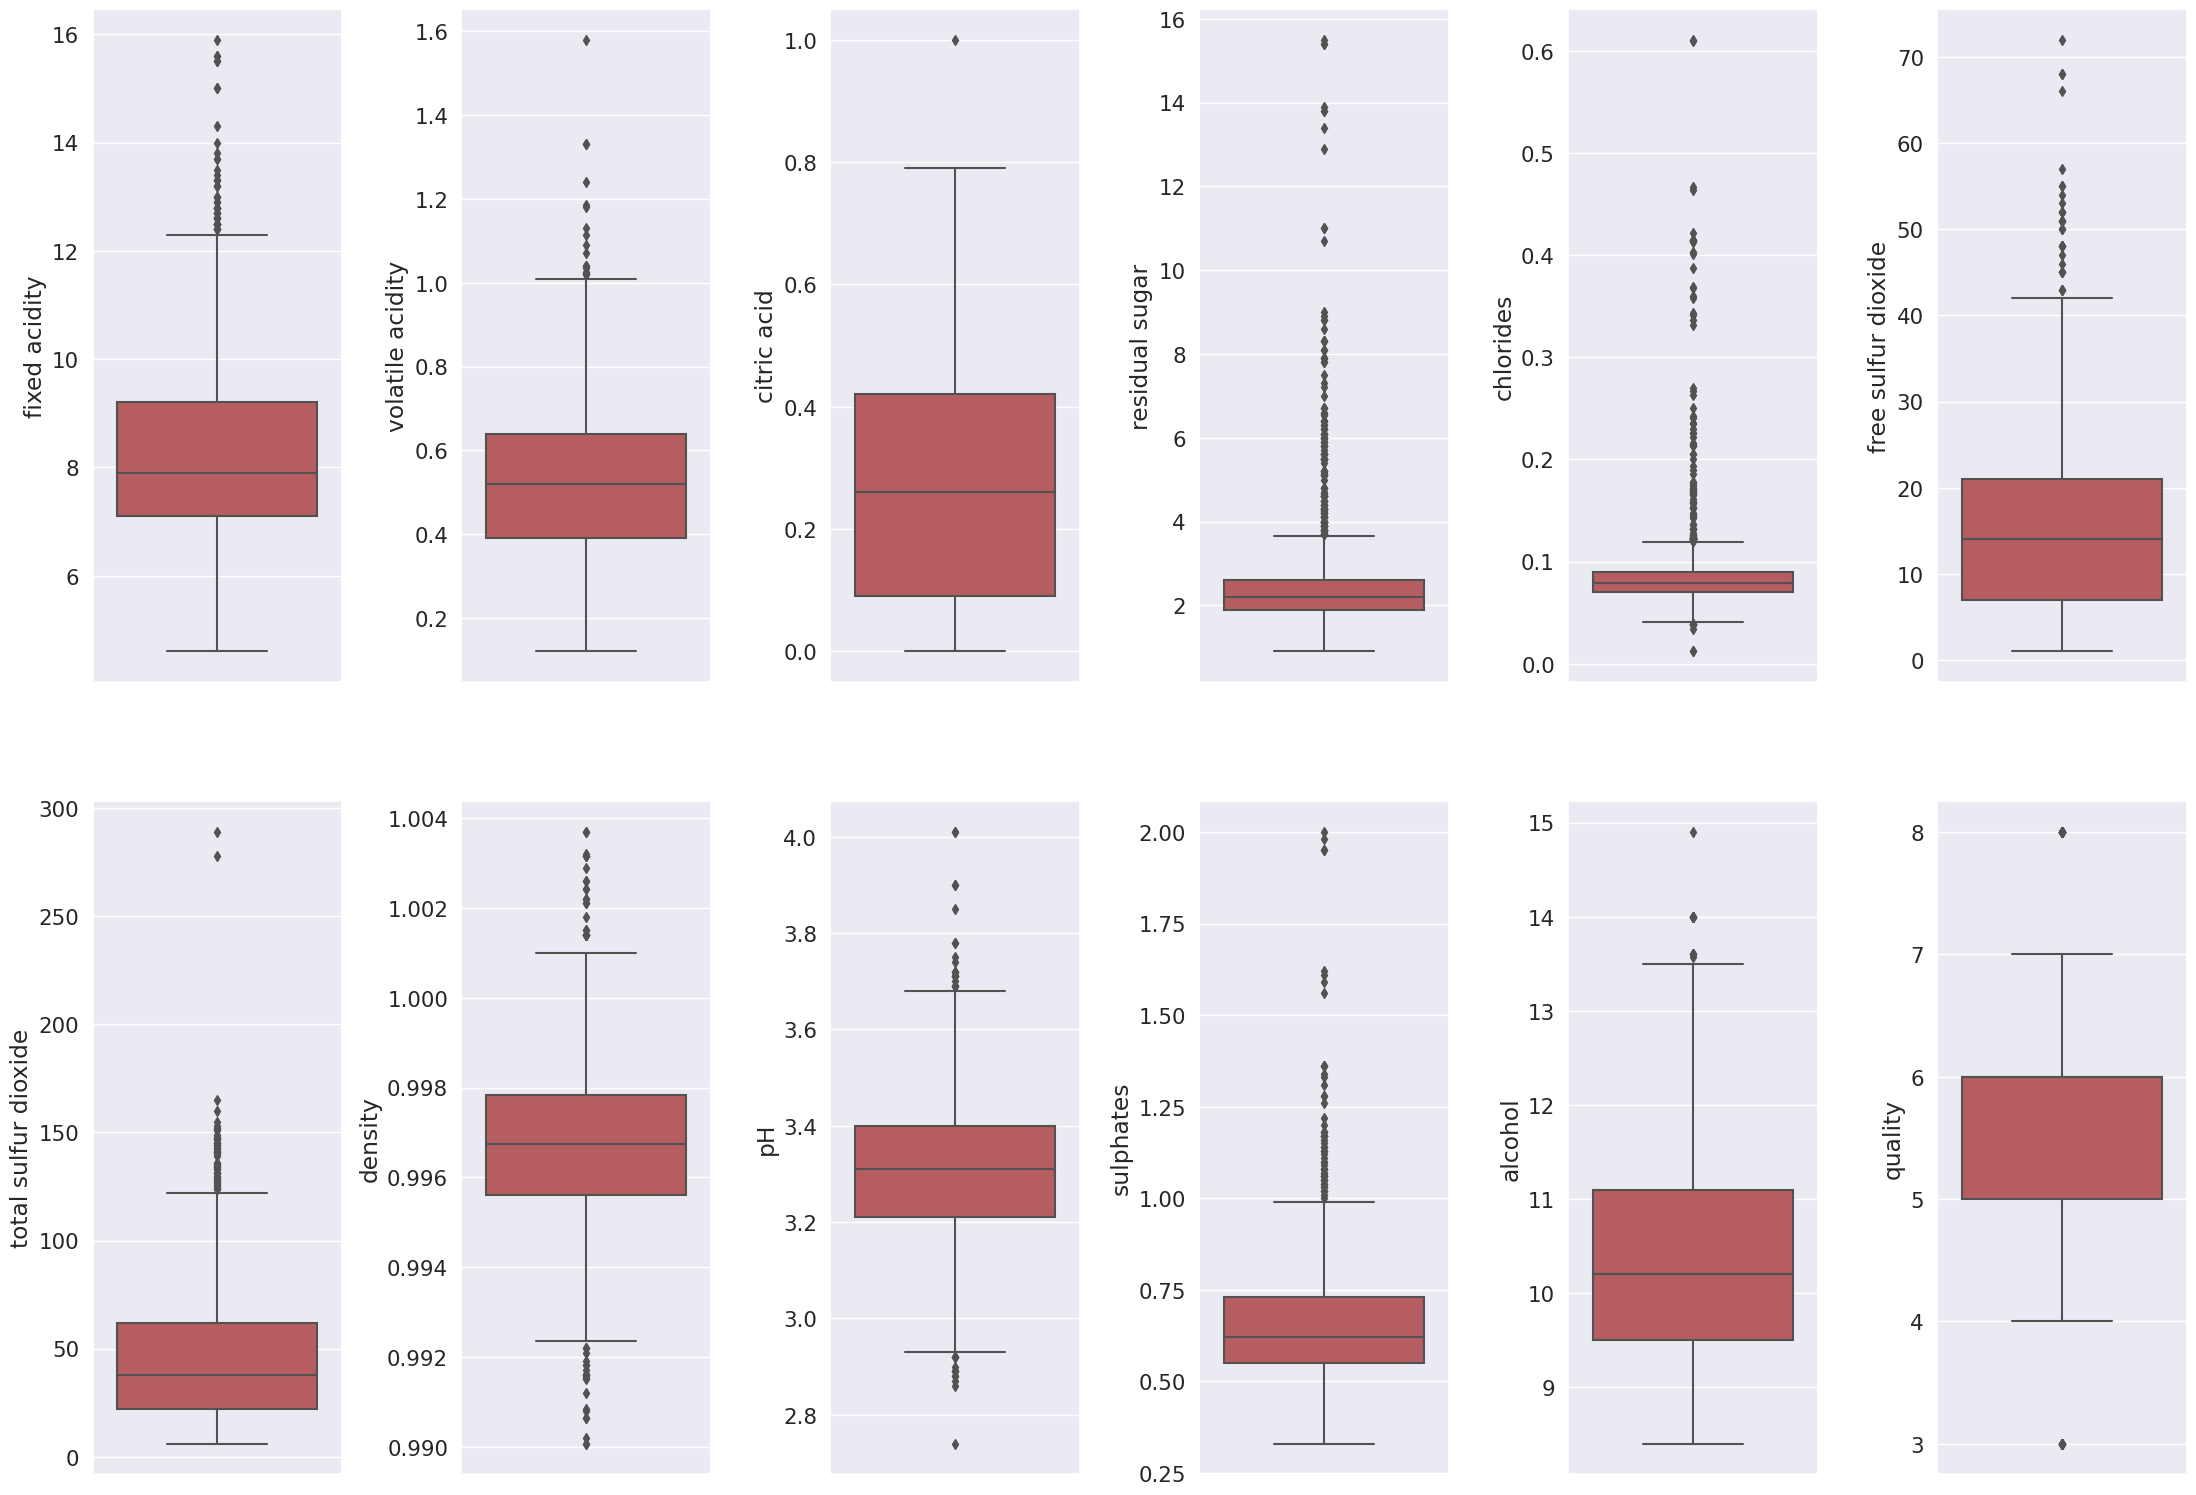

In [49]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(22,15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='r', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

This is the entirety of the dataset columns. Most of them are positively skewed, as seen from the plot beforehand. There are some outliers. I'm going to find out their numbers next.

<a id="data"></a>
<h1><b><p style="background-image: url(https://colorswall.com/images/palettes/shades-xkcd-color-red-wine-8c0034-hex-35132-colorswall.png);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Data Cleaning and Preprocessing</p></b></h1>

In [50]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = (df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))
    num_outliers = outliers.sum()
    print(f"Number of outliers for {col}: {num_outliers} | Percentage: {num_outliers / len(df[col]) * 100}")

Number of outliers for fixed acidity: 49 | Percentage: 3.0644152595372107
Number of outliers for volatile acidity: 19 | Percentage: 1.188242651657286
Number of outliers for citric acid: 1 | Percentage: 0.06253908692933083
Number of outliers for residual sugar: 155 | Percentage: 9.693558474046279
Number of outliers for chlorides: 112 | Percentage: 7.004377736085053
Number of outliers for free sulfur dioxide: 30 | Percentage: 1.876172607879925
Number of outliers for total sulfur dioxide: 55 | Percentage: 3.4396497811131956
Number of outliers for density: 45 | Percentage: 2.8142589118198873
Number of outliers for pH: 35 | Percentage: 2.1888680425265794
Number of outliers for sulphates: 59 | Percentage: 3.6898061288305186
Number of outliers for alcohol: 13 | Percentage: 0.8130081300813009
Number of outliers for quality: 28 | Percentage: 1.7510944340212633


There are no more than 10 percent outliers, so I will leave them as they are.

<div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:10; border-radius: 10px; font-weight: bold; color:black'>
    <center>Train Test Split</center></h4>

    First, I'm going to split the data. In order to see the efficiency of the algorithms, we must test them with data they haven't seen before. Having said that, I'm going to split the data in training split and test split(I think the dataset is kind of small for validation set). I'm going to use a very handy function from sklearn - train_test_split. I'm trying to predict the quality of the wine, so I will use the whole datasets' columns except the last one, which is the thing I'm trying to predict.

In [51]:
df = df.replace({'quality' : {
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Middle',
                                    5 : 'Middle',
                                    4 : 'Bad',
                                    3 : 'Bad',}})

**I'm replacing the values in order to have only 3 classes, the data is too little and the classes were too many. In my previos attempts I tried my best to get the score of the algorithms above 70% but I couldn't. This way the algorithms should worry 2x less about the classes.**

In [52]:
X_temp = df.drop(columns='quality')

In [53]:
y = df.quality

In [54]:
scaler = RobustScaler().fit_transform(X_temp)

I'm going to make the independent variables to be around the same scale. Since we have some outliers, I'm going to try the robust scaler, which handles outliers pretty well.

In [55]:
X = pd.DataFrame(scaler, columns=X_temp.columns)

In [56]:
df.quality.value_counts()

quality
Middle    1319
Good       217
Bad         63
Name: count, dtype: int64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=df["quality"])

In [58]:
assert len(X_train) + len(X_test) == len(df["fixed acidity"])

<a id="data"></a>
<h1><b><p style="background-image: url(https://colorswall.com/images/palettes/shades-xkcd-color-red-wine-8c0034-hex-35132-colorswall.png);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Model Selection</p></b></h1>

<center>
    <div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:10; border-radius: 10px; font-weight: bold; color:black'>
    <center>Logistic Regression</center></h4>
        <center>I'm going to start with the simplest algorithm there is, Logistic regression. It tries to find the best splitting line between classes.<br>
            Instead of using the sigmoid function as in binary logistic regression, multinomial logistic regression uses the softmax function. The softmax function converts a vector of raw scores into a probability distribution over multiple classes. <br>
            I couldn't find a gif with multiple classes, so here it is with two classes.<center>
<center>
<img src="https://miro.medium.com/v2/resize:fit:1400/1*XRCJt-5yNXDfzrVbEbh4DA.gif" width="400" height="300"/>

In [59]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [60]:
logistic_pred = logistic.predict(X_test)

In [61]:
logistic_accuracy = logistic.score(X_test, y_test)

In [62]:
print("Training accuracy for Logistic Regression: ", logistic.score(X_train, y_train)*100, "%")
print("Testing accuracy for Logistic Regression:", logistic_accuracy * 100, "%")

Training accuracy for Logistic Regression:  84.28459734167319 %
Testing accuracy for Logistic Regression: 85.0 %


In [63]:
conf_matrix = confusion_matrix(y_test, logistic_pred)
print(conf_matrix)

[[  0   0  13]
 [  0  16  27]
 [  0   8 256]]


In [64]:
class_report = classification_report(y_test, logistic_pred, target_names=['Bad', 'Good', 'Middle'])
print(class_report)

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        13
        Good       0.67      0.37      0.48        43
      Middle       0.86      0.97      0.91       264

    accuracy                           0.85       320
   macro avg       0.51      0.45      0.46       320
weighted avg       0.80      0.85      0.82       320



What we can conclude from these reports, the results are good, because the majority of the votes are guessed correctly. As for the other two classes, there are some predicted right, but it's not perfect. When the wine is bad, the algorithm did not get any of them right.

In [65]:
coefficients_logistic = logistic.coef_[0]

In [66]:
len(coefficients_logistic)

11

In [67]:
feature_names = np.array(df.drop("quality", axis=1).columns)

In [68]:
def plot_feature_importance(name, coefficients):
    feature_importance_base = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    feature_importance_base['Absolute_Coefficient'] = feature_importance_base['Coefficient'].abs()
    feature_importance_base = feature_importance_base.sort_values(by='Absolute_Coefficient', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_base['Feature'], feature_importance_base['Absolute_Coefficient'])
    plt.xlabel('Absolute Coefficient Value')
    plt.title(f'{name} Feature Importance')
    plt.show()
    return feature_importance_base

A helper function to plot the feature importance.

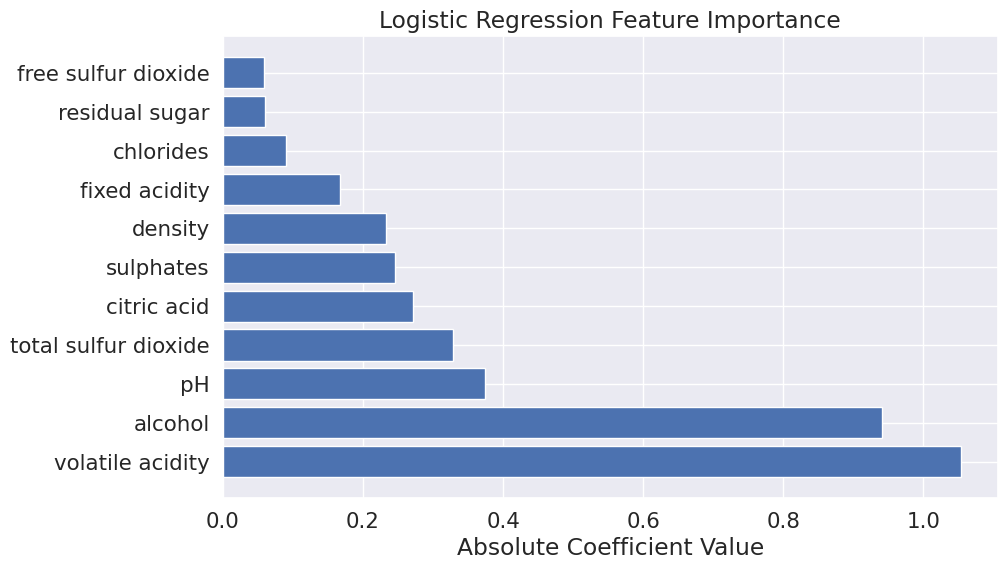

In [69]:
feature_importance_logistic = plot_feature_importance("Logistic Regression", coefficients_logistic)

The volatile acidity and alcohol are the most important features for the logistic regression algorithm, pH is third.

<center>
    <div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:10; border-radius: 10px; font-weight: bold; color:black'>
    <center>KNearestNeighbors</center></h4>
        <center>Continuing with K-Nearest Neighbors algorithm. It's a lazy algorithm: it stores the enirety of the dataset in memory and makes predictions based on proximiy of new instances to existing instances during the prediction phase. It works with Euclidian distance, a.k.a the straigh line difference between points. <center>
<center>
<img src="https://miro.medium.com/v2/resize:fit:1400/1*_r-PcPEK7css8UDINDgkgg.gif" width="600" height="300"/>

In [70]:
knn = KNeighborsClassifier(n_neighbors=7)

In [71]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [72]:
knn_predicted = knn.predict(X_test)

In [73]:
knn_acc = knn.score(X_test, y_test)

In [74]:
print("The training accuracy for KNN is:", knn.score(X_train, y_train)*100, "%")
print("The testing accuracy for KNN is:", knn_acc * 100, "%")

The training accuracy for KNN is: 85.84831899921814 %
The testing accuracy for KNN is: 85.625 %


In [75]:
conf_matrix = confusion_matrix(y_test, knn_predicted)
print(conf_matrix)

[[  0   0  13]
 [  0  19  24]
 [  0   9 255]]


In [76]:
class_report = classification_report(y_test, logistic_pred, target_names=['Bad', 'Good', 'Middle'])
print(class_report)

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        13
        Good       0.67      0.37      0.48        43
      Middle       0.86      0.97      0.91       264

    accuracy                           0.85       320
   macro avg       0.51      0.45      0.46       320
weighted avg       0.80      0.85      0.82       320



Again, although the accuracy is high, the majority of the predicted labels are just from one class only. First class did not get recognized at all.

<center>
    <div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:10; border-radius: 10px; font-weight: bold; color:black'>
    <center>Support Vector Classifier</center></h4>
        <center>Here we have Support Vector Classifier. It is supervised algorithm, not lazy one. The primary goal of SVC is to find a hyperplane that separates the data into different classes. The hyperplane is determined by maximizing the margin, which is the distance between the hyperplane and the nearest points from each class.<center>
<center>
<img src="https://miro.medium.com/v2/resize:fit:1400/1*XHO84_yTSEe8_xdLCJQnRA.gif" width="400" height="300"/>

In [77]:
svc = SVC(kernel="linear", decision_function_shape='ovr')
selector = RFE(svc, n_features_to_select=11)

In [78]:
X_train_selected = selector.fit_transform(X_train, y_train)

In [79]:
svc.fit(X_train_selected, y_train)

SVC(kernel='linear')

In [80]:
svc_pred = svc.predict(X_test)

In [81]:
svc_acc = svc.score(X_test, y_test)

In [82]:
print("The training accuracy for SVC is:", svc.score(X_train, y_train)*100, "%")
print("The testing accuracy for SVC is:", svc_acc * 100, "%")

The training accuracy for SVC is: 82.48631743549649 %
The testing accuracy for SVC is: 82.5 %


In [83]:
conf_matrix = confusion_matrix(y_test, svc_pred)
print(conf_matrix)

[[  0   0  13]
 [  0   0  43]
 [  0   0 264]]


In [84]:
class_report = classification_report(y_test, svc_pred, target_names=['Bad', 'Good', 'Middle'])
print(class_report)

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        13
        Good       0.00      0.00      0.00        43
      Middle       0.82      1.00      0.90       264

    accuracy                           0.82       320
   macro avg       0.27      0.33      0.30       320
weighted avg       0.68      0.82      0.75       320



It's real bad here, the first two classes of wine did not get recognized at all. I could do model tuning, remove stratify from train_test_split, oversampling, undersampling or any strategy that works with imbalanced set. Grid search as well as Kfold also.

In [85]:
coefficients_svc = svc.coef_[0]

In [86]:
len(coefficients_svc)

11

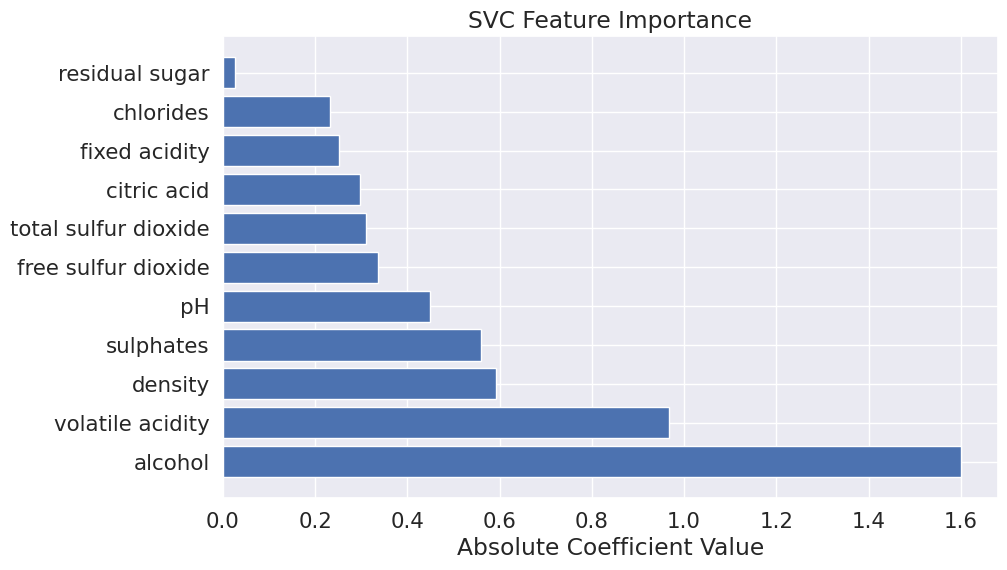

In [87]:
feature_importance_svc = plot_feature_importance("SVC", coefficients_svc)

Alcohol and volatile acidity again on the top 2 places, followed by density and sulphates.

<center>
    <div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:10; border-radius: 10px; font-weight: bold; color:black'>
    <center>Decision Tree Classifier</center></h4>
        <center>They recursively split the dataset, creating a tree structure where each node represents a decision point. Decision rules are determined by optimizing information gain or impurity reduction. These trees are interpretable, handle both numerical and categorical features, and can be used for classification and regression tasks.<center>
<center>
<img src="https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2Fc573e3d2-d2a4-4183-a2b1-0630d2c1ecdd_720x405.gif" width="400" height="300"/>

In [88]:
dtc = DecisionTreeClassifier(criterion="gini", max_depth=50)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50)

In [89]:
dtc_pred = dtc.predict(X_test)

In [90]:
dtc_accuracy = dtc.score(X_test, y_test)

In [91]:
print("The training accuracy for decision tree classifier is:", dtc.score(X_train, y_train)*100, "%")
print("The testing accuracy for decision tree classifier is:", dtc_accuracy * 100, "%")

The training accuracy for decision tree classifier is: 100.0 %
The testing accuracy for decision tree classifier is: 80.0 %


In [92]:
conf_matrix = confusion_matrix(y_test, dtc_pred)
print(conf_matrix)

[[  1   0  12]
 [  0  20  23]
 [ 13  16 235]]


In [93]:
class_report = classification_report(y_test, dtc_pred, target_names=['Bad', 'Good', 'Middle'])
print(class_report)

              precision    recall  f1-score   support

         Bad       0.07      0.08      0.07        13
        Good       0.56      0.47      0.51        43
      Middle       0.87      0.89      0.88       264

    accuracy                           0.80       320
   macro avg       0.50      0.48      0.49       320
weighted avg       0.80      0.80      0.80       320



Our first right predicted class of Bad. the second class is also 50:50, the third class holds the vast majority of correctly predicted values.

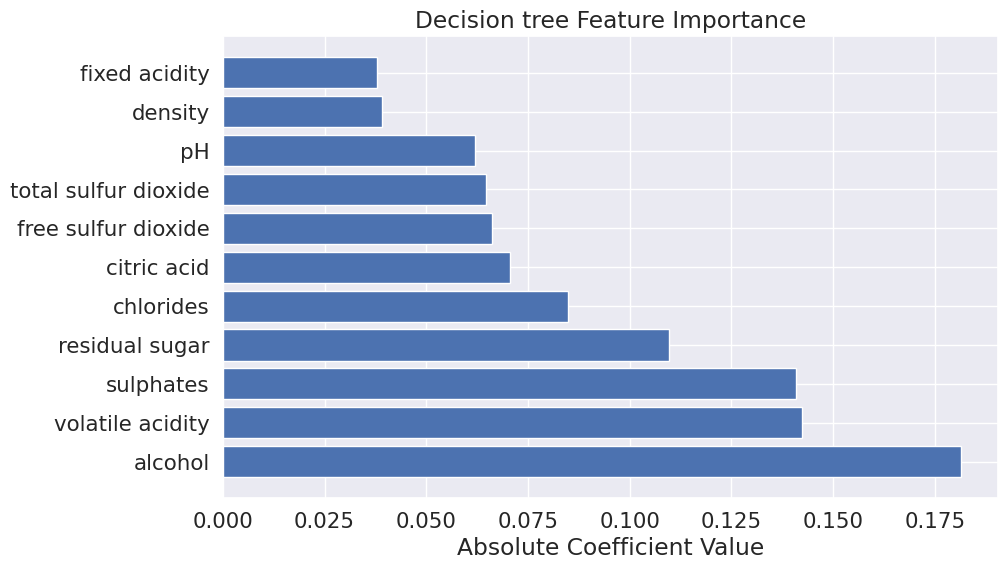

In [94]:
feature_importance_dtc = plot_feature_importance("Decision tree", dtc.feature_importances_)

Again, the alcohol, sulphates and volatile acidity occupy top 3.

<center>
    <div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:10; border-radius: 10px; font-weight: bold; color:black'>
    <center>Random Forest Classifier</center></h4>
        <center>It's in the name: Random. Each decision tree is trained on a random subset of the data and makes independent predictions. The final prediction is determined by aggregating all the decision trees predictions.<center>
<center>
<img src="https://cdn-images-1.medium.com/max/853/0*3sDRsvZmCe-wBQHH" width="400" height="300"/>

In [95]:
rfc = RandomForestClassifier(n_estimators=400, max_depth=30)

In [96]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=400)

In [97]:
rfc_predicted = rfc.predict(X_test)

In [98]:
rfc_accuracy = rfc.score(X_test, y_test)

In [99]:
print("The training accuracy for Random Forest is:", rfc.score(X_train, y_train)*100, "%")
print("The testing accuracy for Random Forest is:", rfc_accuracy * 100, "%")

The training accuracy for Random Forest is: 100.0 %
The testing accuracy for Random Forest is: 87.5 %


In [100]:
conf_matrix = confusion_matrix(y_test, rfc_predicted)
print(conf_matrix)

[[  0   0  13]
 [  0  22  21]
 [  0   6 258]]


In [101]:
class_report = classification_report(y_test, rfc_predicted, target_names=['Bad', 'Good', 'Middle'])
print(class_report)

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        13
        Good       0.79      0.51      0.62        43
      Middle       0.88      0.98      0.93       264

    accuracy                           0.88       320
   macro avg       0.56      0.50      0.52       320
weighted avg       0.83      0.88      0.85       320



The first class is skipped, the second class is a coin toss between the right and the wrong class, the third class is almost perfect.

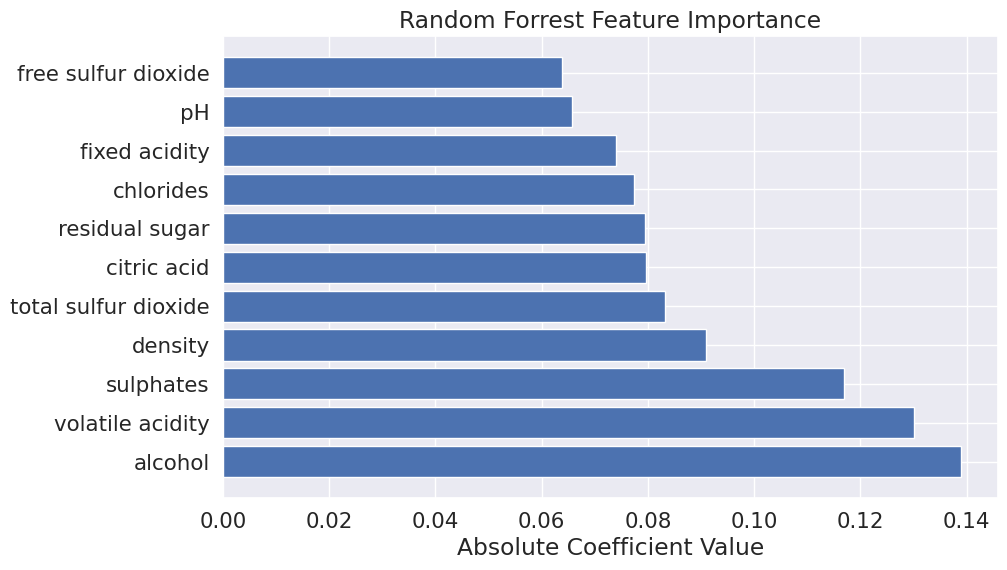

In [102]:
feature_importance_rfc = plot_feature_importance("Random Forrest", rfc.feature_importances_)

The usual suspects are in top 3 again, followed by density and total sulfur dioxide.

<center>
    <div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:10; border-radius: 10px; font-weight: bold; color:black'>
    <center>Bagging Classifier</center></h4>
        <center>It's in the name again, bagging. It combines N instances of the same algorithm, each trained on a slightly different subset of the training data. The subsets are created through a process called bootstrap sampling, where we randomly select data points with replacement. The output is determined by the votes of all the algorithms.<center>
<center>
<img src="https://miro.medium.com/v2/resize:fit:1280/0*P24IVkfG28AeMgFd.gif" width="400" height="300"/>
    

In [103]:
base_classifier = RandomForestClassifier()

In [104]:
bc = BaggingClassifier(base_classifier, n_estimators=40)

In [105]:
bc.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=40)

In [106]:
bc_predicted = bc.predict(X_test)

In [107]:
bc_accuracy = bc.score(X_test, y_test)

In [108]:
print("The training accuracy for Bagging Classifier with DT is:", bc.score(X_train, y_train) * 100, "%")
print("The testing accuracy for Bagging Classifier with DT is:", bc_accuracy * 100, "%")

The training accuracy for Bagging Classifier with DT is: 96.63799843627834 %
The testing accuracy for Bagging Classifier with DT is: 87.5 %


In [109]:
conf_matrix = confusion_matrix(y_test, bc_predicted)
print(conf_matrix)

[[  0   0  13]
 [  0  20  23]
 [  0   4 260]]


In [110]:
class_report = classification_report(y_test, bc_predicted, target_names=['Bad', 'Good', 'Middle'])
print(class_report)

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        13
        Good       0.83      0.47      0.60        43
      Middle       0.88      0.98      0.93       264

    accuracy                           0.88       320
   macro avg       0.57      0.48      0.51       320
weighted avg       0.84      0.88      0.85       320



Almost exactly like the algorithm beforehand, no first class, coin toss second and almost perfect third.

In [111]:
feature_importances = 0
for tree in bc.estimators_:
    feature_importances += tree.feature_importances_

average_feature_importances = feature_importances / len(bc.estimators_)

print("Average Feature Importances:")
for feature, importance in zip(df.columns, average_feature_importances):
    print(f"{feature}: {importance}")

Average Feature Importances:
fixed acidity: 0.07310025439423813
volatile acidity: 0.13184354631702036
citric acid: 0.07885501011225772
residual sugar: 0.0756494540833014
chlorides: 0.0773071981047062
free sulfur dioxide: 0.06123042177579894
total sulfur dioxide: 0.08609184695284999
density: 0.09044292480722742
pH: 0.0674028347923639
sulphates: 0.1173090809457696
alcohol: 0.1407674277144664


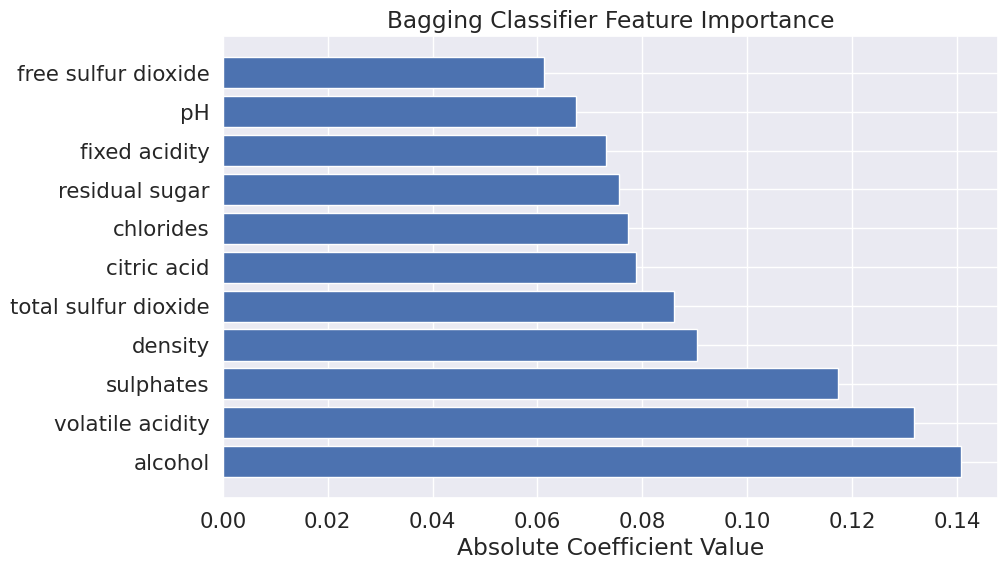

In [112]:
feature_importance_bagging = plot_feature_importance("Bagging Classifier", average_feature_importances)

Top three - alcohol, volatile acidity and sulphates, followed by density and total sulfur dioxide.

<center>
    <div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:10; border-radius: 10px; font-weight: bold; color:black'>
    <center>Boosting Classifier</center></h4>
        <center>It's an ensemble learning technique that focuses on improving the performance of weak models by combining mutiple instances of it. Unlike bagging, where the algorithms are trained independently, boosting trains the algorithms sequentially, with each subsequent model giving more attention to the things that are important from the model before.<center>
<center>
<img src="https://uc-r.github.io/public/images/analytics/gbm/boosted_stumps.gif" width="400" height="300"/>

In [113]:
boosting_classifier = GradientBoostingClassifier(n_estimators=100)

In [114]:
boosting_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [115]:
boosting_predicted = boosting_classifier.predict(X_test)

In [116]:
boosting_accuracy = boosting_classifier.score(X_test, y_test)

In [117]:
print("The training accuracy for Boosting Classifier with DT is:", boosting_classifier.score(X_train, y_train) * 100, "%")
print("The testing accuracy for Boosting Classifier with DT is:", boosting_accuracy * 100, "%")

The training accuracy for Boosting Classifier with DT is: 96.5598123534011 %
The testing accuracy for Boosting Classifier with DT is: 87.1875 %


In [118]:
conf_matrix = confusion_matrix(y_test, boosting_predicted)
print(conf_matrix)

[[  1   0  12]
 [  0  22  21]
 [  2   6 256]]


In [119]:
class_report = classification_report(y_test, boosting_predicted, target_names=['Bad', 'Good', 'Middle'])
print(class_report)

              precision    recall  f1-score   support

         Bad       0.33      0.08      0.12        13
        Good       0.79      0.51      0.62        43
      Middle       0.89      0.97      0.93       264

    accuracy                           0.87       320
   macro avg       0.67      0.52      0.56       320
weighted avg       0.85      0.87      0.85       320



We have one right first class, again with the second class, the coin toss, but the interesting part is that it's a coin toss only between the second and the third class. Second class is never mistaken for the first. Almost perfect third.

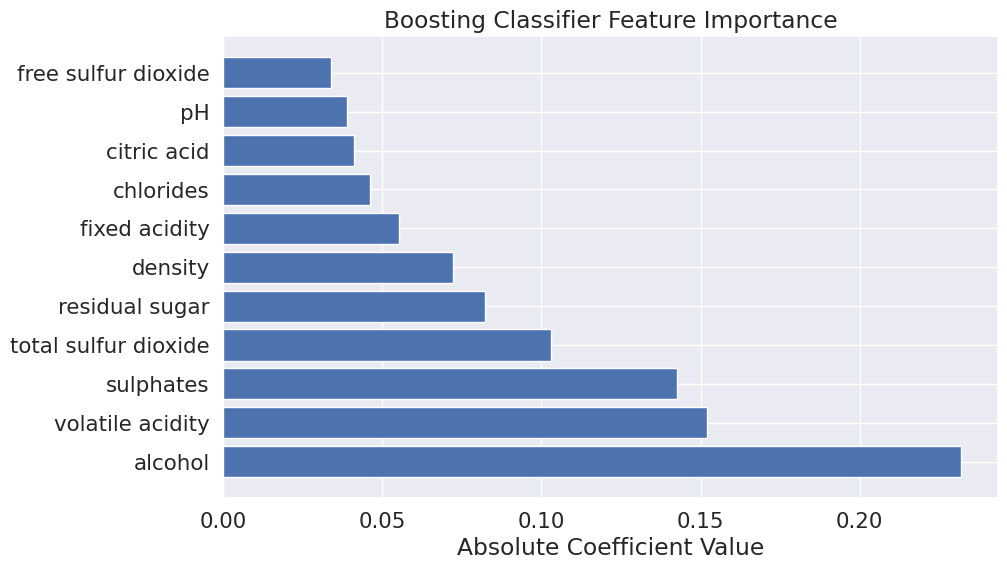

In [120]:
feature_importance_boosting = plot_feature_importance("Boosting Classifier", boosting_classifier.feature_importances_)

Alcohol, volatile acidity and sulphates are again in top 3.

<center>
    <div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:110%;
            text-align: left">

<h4 style='; border:10; border-radius: 10px; font-weight: bold; color:black'>
    <center>Neural Network</center></h4>
        <center>There is a lot going on here, I'm not going to go into details, because this is not the purpose of this notebook. In short, given enough data, the network could approximate any function. In this case we don't have enough data for such a thing, but nevertheless, I will try it.<center>
<center>
<img src="https://community.alteryx.com/t5/image/serverpage/image-id/42339i8BA3F2CCCEDE7458/image-size/large?v=v2&px=999" width="500" height="400"/>

In [121]:
class NeuralNetworkClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.relu1(self.linear1(x))
        x = self.relu2(self.linear2(x))
        x = self.linear3(x)
        return x

In [122]:
model = NeuralNetworkClassifier(len(df.drop("quality", axis=1).columns), 256, 3)

In [123]:
le = LabelEncoder()

In [124]:
X_train_torch = torch.from_numpy(X_train.values).float()
y_train_torch = torch.from_numpy(le.fit_transform(y_train))

In [125]:
train = torch.utils.data.TensorDataset(X_train_torch, y_train_torch)

In [126]:
test = torch.utils.data.TensorDataset(torch.from_numpy(X_test.values).float(), torch.from_numpy(le.fit_transform(y_test.values)))

In [127]:
train_loader = torch.utils.data.DataLoader(train, batch_size = 4, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = 4, shuffle = True)

In [128]:
criterion = nn.CrossEntropyLoss()

In [129]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [130]:
def train():
    epochs = 200
    for epoch in range(epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        if (epoch + 1) % 50:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")
        


In [131]:
train();

Epoch 1/200, Loss: 0.17364124953746796
Epoch 2/200, Loss: 0.3839775323867798
Epoch 3/200, Loss: 0.20542503893375397
Epoch 4/200, Loss: 0.1320570707321167
Epoch 5/200, Loss: 0.6076845526695251
Epoch 6/200, Loss: 0.07649656385183334
Epoch 7/200, Loss: 0.05278678610920906
Epoch 8/200, Loss: 0.2927078902721405
Epoch 9/200, Loss: 0.05401572212576866
Epoch 10/200, Loss: 0.24196116626262665
Epoch 11/200, Loss: 0.09587781876325607
Epoch 12/200, Loss: 0.08575999736785889
Epoch 13/200, Loss: 0.1998409777879715
Epoch 14/200, Loss: 1.1172667741775513
Epoch 15/200, Loss: 0.22913813591003418
Epoch 16/200, Loss: 0.7859194278717041
Epoch 17/200, Loss: 0.005735567305237055
Epoch 18/200, Loss: 0.4016056954860687
Epoch 19/200, Loss: 0.6593788266181946
Epoch 20/200, Loss: 0.09375541657209396
Epoch 21/200, Loss: 0.73480623960495
Epoch 22/200, Loss: 0.004243067931383848
Epoch 23/200, Loss: 0.4119907319545746
Epoch 24/200, Loss: 0.25418347120285034
Epoch 25/200, Loss: 0.018296020105481148
Epoch 26/200, Loss:

In [132]:
model.eval()
correct = 0
total = 0

all_labels = []
all_predicted = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        all_labels.extend(labels.numpy())
        all_predicted.extend(predicted.numpy())

accuracy_neural = correct / total
print(f"Test Accuracy: {accuracy_neural * 100:.2f}%")

Test Accuracy: 81.56%


In [133]:
conf_matrix = confusion_matrix(all_labels, all_predicted)
print(conf_matrix)

[[  0   1  12]
 [  1  25  17]
 [ 10  18 236]]


In [134]:
class_report = classification_report(all_labels, all_predicted)
print(class_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.57      0.58      0.57        43
           2       0.89      0.89      0.89       264

    accuracy                           0.82       320
   macro avg       0.49      0.49      0.49       320
weighted avg       0.81      0.82      0.81       320



It's all over the place, but it gets the majority of the classes right. Interesting part is that the classes it got wrong are flipped, from  the third class only to the first class only.

<a id="data"></a>
<h1><b><p style="background-image: url(https://colorswall.com/images/palettes/shades-xkcd-color-red-wine-8c0034-hex-35132-colorswall.png);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Model Interpretability</p></b></h1>

In [135]:
models = {'Logistic': logistic_accuracy, 'KNN': knn_acc, 'SVC': svc_acc, 'Decision Tree': dtc_accuracy, 'Random Forest': rfc_accuracy, 
             'Bagging Classifier': bc_accuracy, 'Boosting Classifier': boosting_accuracy, 'Neural Network': accuracy_neural}
models_df = pd.DataFrame(pd.Series(models))
models_df.columns = ['Scores']
models_df['Name'] = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest', 
         'Bagging Classifier', 'Boosting Classifier', 'Neural Network']
models_df.set_index(pd.Index([1, 2, 3 , 4, 5 , 6, 7, 8]))

,Scores,Name
1,0.850000,Logistic Regression
2,0.856250,KNN
3,0.825000,SVC
4,0.800000,Decision Tree
5,0.875000,Random Forest
6,0.875000,Bagging Classifier
7,0.871875,Boosting Classifier
8,0.815625,Neural Network


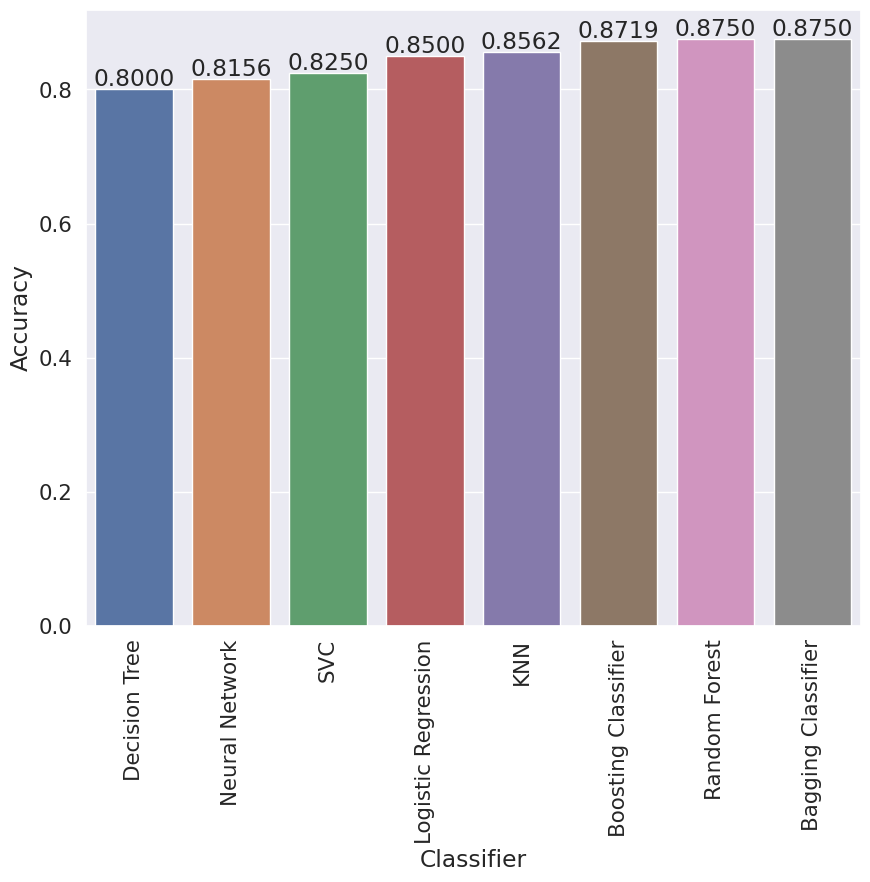

In [136]:
plt.figure(figsize=[10, 8])
axis = sns.barplot(x = 'Name', y = 'Scores', data = models_df.sort_values(by=['Scores']))
axis.set(xlabel='Classifier', ylabel='Accuracy')
plt.xticks(rotation=90)
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 

Decent improvement, only changing the classes to be in the range from 1 to 3, increased the accuracy of the algorithms by ~30%.

In [137]:
min_max = MinMaxScaler()

In [138]:
feature_importance_bagging["Normalized"] = min_max.fit_transform(feature_importance_bagging[["Absolute_Coefficient"]])

In [139]:
feature_importance_boosting["Normalized"] = min_max.fit_transform(feature_importance_boosting[["Absolute_Coefficient"]])

In [140]:
feature_importance_dtc["Normalized"] = min_max.fit_transform(feature_importance_dtc[["Absolute_Coefficient"]])

In [141]:
feature_importance_logistic["Normalized"] = min_max.fit_transform(feature_importance_logistic[["Absolute_Coefficient"]])

In [142]:
feature_importance_rfc["Normalized"] = min_max.fit_transform(feature_importance_rfc[["Absolute_Coefficient"]])

In [143]:
feature_importance_svc['Normalized'] = min_max.fit_transform(feature_importance_svc[["Absolute_Coefficient"]])

In [144]:
feature_importance_list = [feature_importance_bagging, feature_importance_boosting, feature_importance_dtc, feature_importance_logistic,
         feature_importance_rfc, feature_importance_svc]

In [145]:
concatenated = pd.concat(feature_importance_list)

In [146]:
grouped_df = concatenated.groupby('Feature').agg({'Normalized': 'mean'}).reset_index()
grouped_df.sort_values(by="Normalized")

,Feature,Normalized
5,free sulfur dioxide,0.065568
4,fixed acidity,0.107203
6,pH,0.146926
1,chlorides,0.155610
2,citric acid,0.180508
7,residual sugar,0.189235
3,density,0.244226
9,total sulfur dioxide,0.259883
8,sulphates,0.534227
10,volatile acidity,0.782051


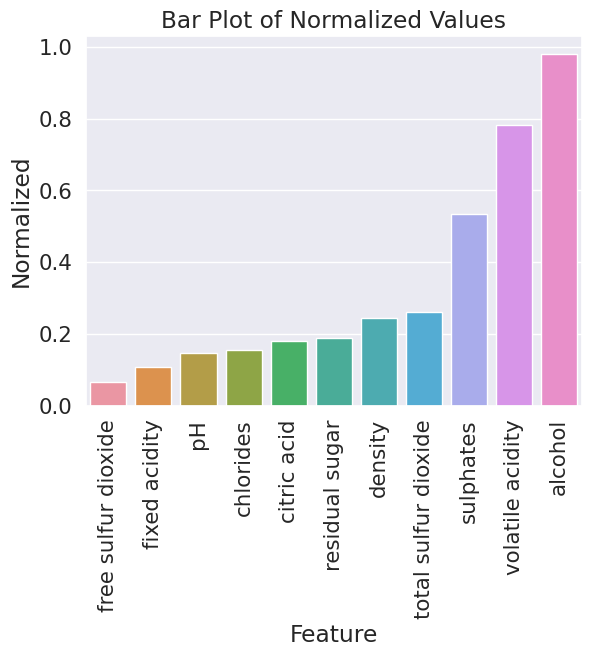

In [147]:
sns.barplot(x='Feature', y='Normalized', data=grouped_df.sort_values(by="Normalized"))
plt.title('Bar Plot of Normalized Values')
plt.xticks(rotation=90)
plt.show()

<h3>
    Alcohol, volatile acidity and sulphates are top 3 when it comes to influencing the algorithm. <br><br>
</h3>
<h3>
    I'm going to make another plot just to see how frequent are these features in top 5 of every algorithm.
</h3>

In [148]:
features_count = {}
for data_frame in feature_importance_list:
    for feature in data_frame["Feature"][:5]:
        if feature in features_count:
            features_count[feature] += 1
        else:
            features_count[feature] = 1

In [149]:
features_count

{'alcohol': 6,
 'volatile acidity': 6,
 'sulphates': 5,
 'density': 3,
 'total sulfur dioxide': 4,
 'residual sugar': 2,
 'chlorides': 1,
 'pH': 2,
 'citric acid': 1}

In [150]:
features_df = pd.DataFrame(list(features_count.items()), columns=['Feature', 'Count']).sort_values(by="Count")

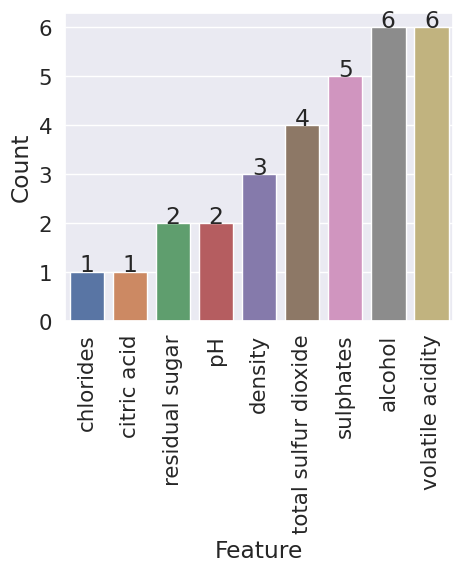

In [151]:
plt.figure(figsize=[5, 4])
axis = sns.barplot(x = 'Feature', y = 'Count', data = features_df)
axis.set(xlabel='Feature', ylabel='Count')
plt.xticks(rotation=90)
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.0f}'.format(height), ha="center") 

* **These feature varies from executing to executing(at least the less frequent ones). I could not find a way to make the text cell dynamic, so some of the places might not be true.**

<center>
    <div style="border-radius:10px;
            border : black solid;
            background-color: #E6E6FA;
            font-size:110%;
            text-align: left">

<h4 style='; border:10; border-radius: 10px; font-weight: bold; color:black'>
    <center>Results</center></h4>
        <center>Total algorithms used: 8, two of them do not have feature importances or at least not so straightforward.</center>

* **Alcohol** is tied for the first place with Volative Acidity. Alcohol appears in all algorithms choices.<br><br>
* **Volatile Acidity** is tied for the first place with Alcohol. It appears in all algorithms.<br><br>
* **Sulphates** are close second. They are 5/6 times in top five.<br><br>
* **Total Sulfur Dioxide** is the fourth one. It was in 4/6 algorithms choice.<br><br>
* **Density** is the fifth one. It was in half of the algorithms choice. <br><br>
* **Residiual Sugar** is sixth. It was in third of the total algorithms. <br><br>
* **pH** is also sixth. It was in third of the total algorithms as well. <br><br>
* **Citric Acid** is also sixth. It was in third of the total algorithms as well.

In [152]:
palette = {
    "free sulfur dioxide": "tab:cyan",
    "pH": "tab:orange", 
    "fixed acidity": "tab:purple",
    "chlorides": "tab:green",
    "alcohol": "tab:red",  
    "density": "tab:blue",  
    "sulphates": "tab:pink",  
    "citric acid": "tab:brown",  
    "total sulfur dioxide": "tab:olive",
    "residual sugar": "tab:purple",
    "volatile acidity": "tab:gray"
}

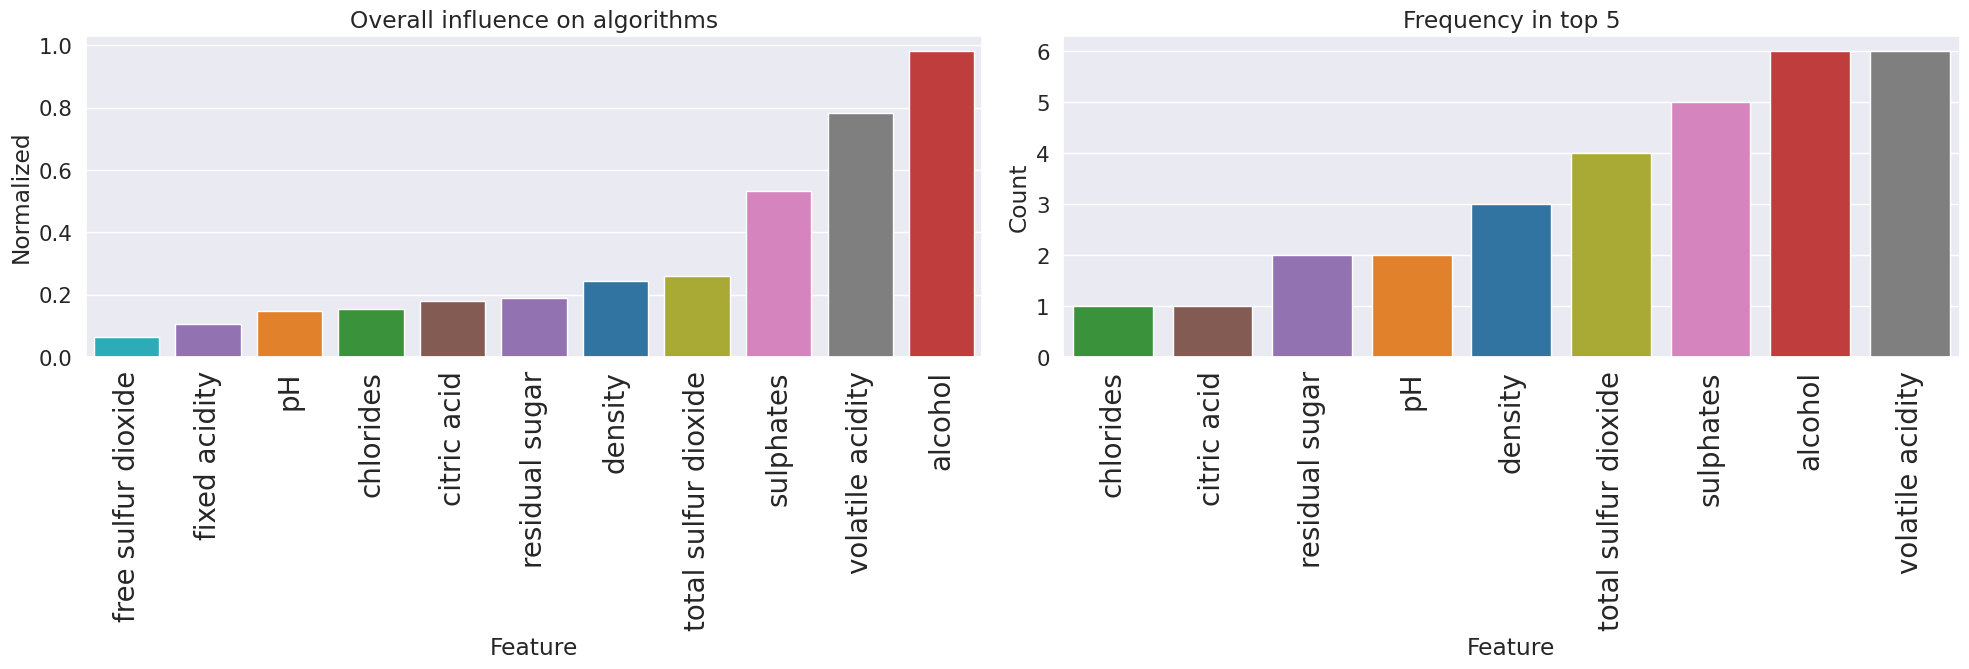

In [153]:
plt.figure(figsize=[20, 7])
plt.subplot(1, 2, 1)
sns.barplot(x='Feature', y='Normalized', data=grouped_df.sort_values(by="Normalized"), palette=palette)
plt.title('Overall influence on algorithms')
plt.xticks(rotation=90)
plt.xticks(fontsize=20)


plt.subplot(1, 2, 2)
sns.barplot(x='Feature', y='Count', data=features_df, palette=palette)
plt.title('Frequency in top 5')
plt.xticks(rotation=90)
plt.xticks(fontsize=20)

plt.tight_layout()  
plt.show()

As we can see, these are the two most important plots in this project(I think). The one from the left is how much the feature has influenced algorithms to take the right decision. Alcohol, volatile acidity and sulphates are the top 3, followed by total sulfur dioxide.  <br><br>
On the right side is a frequence counter plot. It describes how many times the feature has been in top 5 of influencers. Clear winners are alcohol, volatile acidity, total sulfur dioxide and sulphates. 

<center>
    <div style="border-radius:10px;
            border : black solid;
            background-color: #E6E6FA;
            font-size:110%;
            text-align: left">

<h4 style='; border:10; border-radius: 10px; font-weight: bold; color:black'>
    <center>Conclusion</center></h4>


* Among the features considered, **'Alcohol'** consistently emerged as the most influential in predicting wine quality, followed by **Volatile Acidity**, **Sulphates**, **Density** and **Total Sulfure Dioxide**. These findings indicate the importance of these features in the algorithms' predictions.<br><br><br>

* In addition to individual feature importance, the feature frequency analysis highlighted the most frequently occurring features in the top 5 across algorithms. These include **'Alcohol'**, **Volatile Acidity**, **Sulphates**, **Density** and **Total Sulfure Dioxide**. Understanding the recurring importance of these features provides insights into their collective impact on wine quality predictions.<br><br><br>

* These observations suggest that the models consistently recognized the influence of multiple factors on wine quality. Notably, an increase in **Alcohol** content emerged as a key positive contributor to enhanced wine quality. Additionally, the models demonstrated an understanding of the nuanced relationships with other features. For instance, a decrease in **Volatile Acidity**, an increase in **Sulphates**, and a decrease in **Density** were also identified as factors associated with heightened wine quality. These findings indicate the complexity of the interplay between multiple features, both positively and negatively correlated, in influencing the perceived quality of wine. Despite the presence of these intricate relationships, the models successfully navigated the complexities, emphasizing their ability to capture the diverse factors influencing wine quality predictions. 


<center><img src="https://img.freepik.com/free-vector/thank-you-lettering_1262-6963.jpg" /></center>